<center><h1>SEOUL BIKE TRIP DURATION PREDICTION</h1></center>


<b>Problem Statement: </b>The duration of a trip is the most crucial measure in all modes of transportation. Hence, it is crucial to predict the trip time precisely for the advancement of Intelligent Transport Systems (ITS) and traveler information systems. The prediction can be done using the Seoul Bike data and weather data. We need to use this combination of Seoul Bike data and weather data to do the trip duration prediction.​

## ABOUT DATASET 
- <b>Dataset File Name:</b> `for_modeling.csv`
- <b>Dataset Shape:</b> (9601139, 26)
- <b>Columns in the dataset:</b>
    - Unnamed: 0
    - Duration 
    - Distance
    - PLong
    - PLatd
    - DLong
    - DLatd
    - Haversine
    - Pmonth
    - Pday
    - Phour
    - Pmin
    - PDweek
    - Dmonth
    - Dday
    - Dhour
    - Dmin
    - DDweek
    - Temp
    - Precip
    - Wind
    - Humid
    - Solar
    - Snow
    - GroundTemp
    - Dust

### Importing required libraries

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import warnings

np.random.seed(24)
random.seed(24)
warnings.filterwarnings("ignore")

In [ ]:
# import dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the dataset

In [ ]:
# Read csv using pandas
train = pd.read_csv('/content/drive/MyDrive/seoul bike trip/For_modeling.csv.zip')

In [ ]:
# check the shape of the data
train.shape

(9601139, 26)

In [ ]:
# sample 100000 rows of data
train = train.sample(n=100000).reset_index().drop(columns=['index'])

In [ ]:
# check the shape
train.shape

(100000, 26)

In [ ]:
# check the top 5 rows
train.head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,6176536,19,3720,37.613956,127.030251,37.638706,127.015907,3.028153,9,13,...,15,3,20.9,0.0,1.7,68.0,0.00,0.0,20.0,27.0
1,8576807,16,2970,37.586388,126.935127,37.564541,126.927071,2.530896,11,5,...,2,0,16.8,0.0,1.1,46.0,1.71,0.0,23.2,58.0
2,8714908,5,980,37.464550,126.883728,37.456841,126.888344,0.949100,11,10,...,56,5,9.3,0.0,0.3,85.0,0.07,0.0,8.7,83.0
3,4599459,6,980,37.546307,127.049805,37.539654,127.052589,0.779438,8,1,...,23,2,36.8,0.0,1.3,39.0,2.80,0.0,54.9,37.0
4,4460101,59,8880,37.556610,126.898018,37.556610,126.898018,0.000000,7,27,...,16,4,30.3,0.0,1.1,75.0,0.00,0.0,30.2,28.0


## Exploring the Data
### Identifying the number of features or columns

In [ ]:
# Check all the columns in the dataset
train.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

### Drop irrelevant columns from dataset

In [ ]:
# Dropping irrelevant column from the dataset i.e Unnamed: 0
train.drop('Unnamed: 0', axis=1, inplace=True)

### Knows more about the data in the columns like data type it contains and total samples of each

In [ ]:
# Check which columns are having categorical, numerical or boolean values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Duration    100000 non-null  int64  
 1   Distance    100000 non-null  int64  
 2   PLong       100000 non-null  float64
 3   PLatd       100000 non-null  float64
 4   DLong       100000 non-null  float64
 5   DLatd       100000 non-null  float64
 6   Haversine   100000 non-null  float64
 7   Pmonth      100000 non-null  int64  
 8   Pday        100000 non-null  int64  
 9   Phour       100000 non-null  int64  
 10  Pmin        100000 non-null  int64  
 11  PDweek      100000 non-null  int64  
 12  Dmonth      100000 non-null  int64  
 13  Dday        100000 non-null  int64  
 14  Dhour       100000 non-null  int64  
 15  Dmin        100000 non-null  int64  
 16  DDweek      100000 non-null  int64  
 17  Temp        100000 non-null  float64
 18  Precip      100000 non-null  float64
 19  Win

**After checking the Dtypes of all the columns**

**object - String values**

**float64 - Numerical values**

**Observation: There are no String values so there are no categorical data**

### Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [ ]:
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns 
train.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,25.812430,3727.548850,37.547560,126.990630,37.547776,126.990565,1.871322,7.576100,15.76668,14.41262,...,30.06493,2.945550,18.576912,0.017616,1.823674,53.906410,0.731978,0.009703,20.742799,32.597040
std,25.034026,3967.620715,0.044456,0.082405,0.044534,0.083138,1.993941,2.699422,8.75548,6.23785,...,17.34080,1.978844,9.479924,0.338270,0.973055,17.355501,0.920194,0.159363,12.629369,24.233386
min,1.000000,1.000000,37.437271,126.798599,37.437271,126.798599,0.000000,1.000000,1.00000,0.00000,...,0.00000,0.000000,-17.800000,0.000000,0.000000,10.000000,0.000000,0.000000,-13.600000,0.000000
25%,8.000000,1230.000000,37.514240,126.920128,37.514240,126.919579,0.675867,6.000000,8.00000,10.00000,...,15.00000,1.000000,12.300000,0.000000,1.100000,41.000000,0.000000,0.000000,11.600000,16.000000
50%,16.000000,2280.000000,37.546631,126.994263,37.546631,126.994263,1.257811,8.000000,16.00000,16.00000,...,30.00000,3.000000,20.100000,0.000000,1.700000,53.000000,0.270000,0.000000,21.100000,27.000000
75%,36.000000,4660.000000,37.573242,127.061310,37.573277,127.062424,2.363247,10.000000,23.00000,19.00000,...,45.00000,5.000000,25.500000,0.000000,2.400000,67.000000,1.260000,0.000000,28.500000,43.000000
max,119.000000,33060.000000,37.689720,127.180267,37.689720,127.180267,23.805294,12.000000,31.00000,23.00000,...,59.00000,6.000000,39.400000,35.000000,7.400000,98.000000,3.520000,8.800000,62.200000,304.000000


### Get the total number of samples in the dataset using the len() function

In [ ]:
# check length of dataset
len(train)

100000

### Get unique values

In [ ]:
# check for unique values in dataset
train.nunique()

Duration        119
Distance       2563
PLong          1468
PLatd          1474
DLong          1455
DLatd          1462
Haversine     35777
Pmonth           12
Pday             31
Phour            24
Pmin             60
PDweek            7
Dmonth           12
Dday             31
Dhour            24
Dmin             60
DDweek            7
Temp            538
Precip           42
Wind             64
Humid            89
Solar           345
Snow             40
GroundTemp      692
Dust            162
dtype: int64

### Counting the total number of missing value

In [ ]:
# Check for missing values in all the columnns of the dataset
train.isnull().sum()

Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

There is no missing values in this dataset

## Exploratory Data Analysis (EDA)

### CORRELATION MATRIX


Why ?

**A correlation matrix is a table showing correlation coefficients between variables**

There are three broad reasons for computing a correlation matrix:
1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.


In [ ]:
#correlation matrix Using pandas
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
Duration,1.00,0.73,-0.05,-0.00,-0.04,-0.00,0.35,-0.04,-0.01,0.13,-0.01,0.08,-0.04,-0.01,0.14,-0.01,0.08,0.13,-0.01,0.08,-0.10,0.07,-0.01,0.12,-0.02
Distance,0.73,1.00,-0.05,-0.01,-0.04,-0.01,0.58,-0.03,-0.01,0.10,-0.01,0.05,-0.03,-0.01,0.10,-0.01,0.05,0.10,-0.01,0.03,-0.03,-0.01,-0.02,0.07,-0.03
PLong,-0.05,-0.05,1.00,0.12,0.93,0.13,-0.04,-0.00,-0.00,-0.01,0.00,0.00,-0.00,-0.00,-0.01,0.01,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00
PLatd,-0.00,-0.01,0.12,1.00,0.13,0.96,0.01,0.02,0.01,-0.00,-0.01,0.01,0.02,0.01,-0.00,-0.00,0.01,0.00,-0.01,-0.00,-0.01,-0.01,-0.00,-0.00,0.00
DLong,-0.04,-0.04,0.93,0.13,1.00,0.13,-0.02,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00
DLatd,-0.00,-0.01,0.13,0.96,0.13,1.00,0.01,0.01,0.01,0.00,-0.01,0.01,0.01,0.01,0.00,-0.00,0.01,0.00,-0.01,0.00,-0.01,-0.00,-0.00,0.00,0.00
Haversine,0.35,0.58,-0.04,0.01,-0.02,0.01,1.00,-0.03,-0.01,0.01,-0.02,0.00,-0.03,-0.01,0.02,-0.00,0.00,0.03,-0.01,0.00,0.01,-0.04,-0.01,0.00,-0.02
Pmonth,-0.04,-0.03,-0.00,0.02,-0.00,0.01,-0.03,1.00,-0.07,-0.01,-0.00,-0.02,1.00,-0.07,-0.01,0.00,-0.02,-0.10,-0.01,-0.18,0.02,-0.14,-0.01,-0.14,-0.08
Pday,-0.01,-0.01,-0.00,0.01,-0.00,0.01,-0.01,-0.07,1.00,-0.01,0.01,0.01,-0.07,1.00,-0.01,0.00,0.01,-0.03,0.02,-0.03,-0.04,0.00,0.05,-0.02,0.08
Phour,0.13,0.10,-0.01,-0.00,0.00,0.00,0.01,-0.01,-0.01,1.00,-0.02,-0.01,-0.01,-0.01,0.89,-0.02,-0.01,0.17,-0.00,0.23,-0.20,-0.08,-0.02,0.09,-0.03


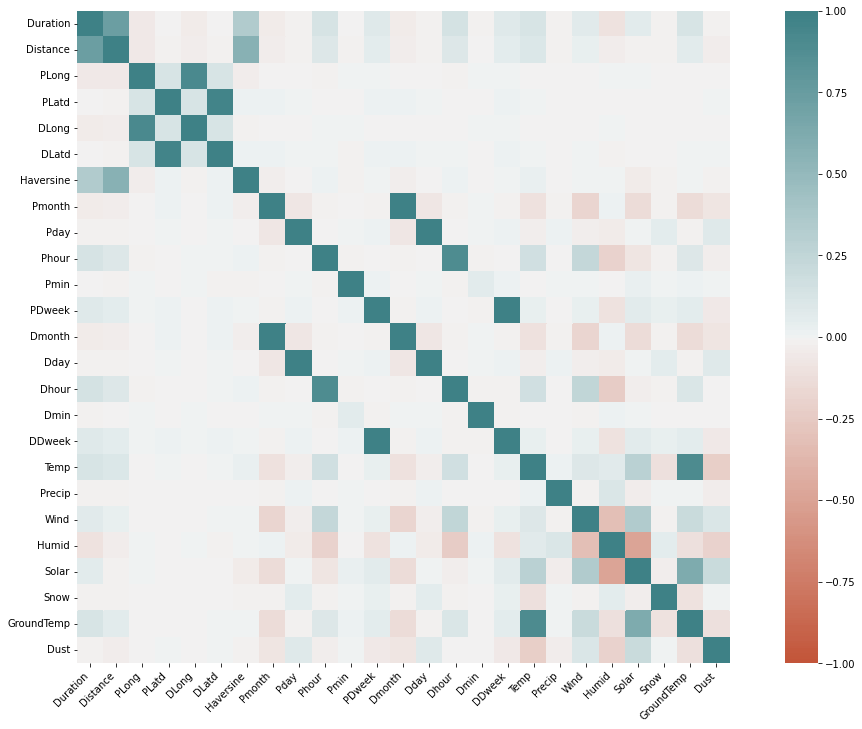

In [ ]:
# correlation matrix Using seaborn
plt.figure(figsize=(20,12))
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20,200, n=200),
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');

**Observation from above correlation matrix**
1. distance and duration are strongly related
2. haversine and duration and correlated with each other
3. gound temperature and solar radiation are correlated
4. temperature and solar radiations are correlated
5. phour and dhour are not related to humidity

## SCATTER PLOT

1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.

In [ ]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x,y):
  plt.figure()
  plt.xlabel(x)
  plt.ylabel(y)
  plt.scatter(train[x],train[y])
  plt.show()

# Loop through numerical data list and use function to scatter plot between two columns
column_list = train.columns
for i in column_list:
  for j in column_list:
     if i != j:
       plot_scatter(i,j)

PLong and DLong are correlated

PLatd and DLatd are correlated

Pmonth and Dmonth are correlated

## HISTOGRAM

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

In [ ]:
#Histogram Using pandas 
train.hist(figsize=(18,15), legend=True);

Observation -
2. data distribution of duration, distance, haversine, precipation, solar radiation, snow and dust are skewed right.
3. data distribution of humidity is symmetrical
4. data distribution of Pmin and Dmin is right skewed.
4. data distribution of Phour and Dhour is same.
4. data distribution of pday and Dday is same.
4. data distribution of Pmonth and Dmonth is same

## VIF - Variance inflation factor
1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model.
2. It is used for diagnosing collinearity/multicollinearity.
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [ ]:
# import statsmodle library for vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# creating a dataframe of just numerical values
train_vif = train.drop(['Duration'], axis=1)
# target values
y = train['Duration']
# numerical values column names

print(train_vif.columns)


Index(['Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine', 'Pmonth',
       'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour', 'Dmin',
       'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')


In [ ]:
names = train_vif.columns
names

Index(['Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine', 'Pmonth',
       'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour', 'Dmin',
       'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

In [ ]:
# droping rows with empty cells
train_vif.columns == names[1]

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
train_vif


,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,20260,37.517693,126.914299,37.547871,126.923531,3.452977,9,6,11,45,...,14,3,25.9,0.0,2.5,63.0,1.32,0.0,29.1,48.0
1,2000,37.481339,126.950645,37.488564,126.928482,2.114141,4,6,15,33,...,49,4,6.8,0.0,4.1,50.0,0.56,0.0,11.0,304.0
2,1140,37.528614,127.038559,37.529301,127.035599,0.271970,10,16,17,13,...,42,1,18.4,0.0,1.8,38.0,0.50,0.0,19.1,48.0
3,7890,37.556862,127.079140,37.511982,127.085052,5.017589,7,28,10,12,...,51,5,32.0,0.0,0.9,65.0,1.19,0.0,40.2,37.0
4,3550,37.540981,126.838547,37.557461,126.861458,2.727207,9,2,17,33,...,56,6,28.8,0.0,2.0,47.0,1.00,0.0,33.4,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,240,37.583515,126.979668,37.583603,126.972549,0.627390,7,11,17,9,...,13,2,28.7,0.0,2.9,71.0,0.71,0.0,28.9,16.0
99996,50,37.544666,126.888359,37.544666,126.888359,0.000000,5,19,14,34,...,40,5,22.8,0.0,2.6,39.0,3.39,0.0,35.7,38.0
99997,2990,37.641739,127.024628,37.629917,127.040916,1.945544,7,24,21,48,...,19,1,30.2,0.0,2.3,65.0,0.00,0.0,29.7,38.0
99998,1390,37.543579,126.951324,37.550411,126.943848,1.005747,6,4,8,50,...,2,0,22.1,0.0,1.4,44.0,1.16,0.0,29.4,35.0


In [ ]:
# Calculating VIF for each feature.
import statsmodels.api as sm

for i in range (0, len(names)):
  y = train_vif.loc[:, train_vif.columns == names[i]]
  x = train_vif.loc[:, train_vif.columns != names[i]]

  model = sm.OLS(y,x)
  results = model.fit()
  rsq = results.rsquared
  VIF = round(1/(1-rsq),2)

  print("R Square value of {} column is {} keeping all other columns as features".format(names[i],round(rsq,2)))
  print("Variance inflation Factor of {} column is {} \n".format(names[i], VIF))
  

R Square value of Distance column is 0.65 keeping all other columns as features
Variance inflation Factor of Distance column is 2.88 

R Square value of PLong column is 1.0 keeping all other columns as features
Variance inflation Factor of PLong column is 5206455.31 

R Square value of PLatd column is 1.0 keeping all other columns as features
Variance inflation Factor of PLatd column is 31057931.05 

R Square value of DLong column is 1.0 keeping all other columns as features
Variance inflation Factor of DLong column is 5206686.41 

R Square value of DLatd column is 1.0 keeping all other columns as features
Variance inflation Factor of DLatd column is 30978482.14 

R Square value of Haversine column is 0.65 keeping all other columns as features
Variance inflation Factor of Haversine column is 2.83 

R Square value of Pmonth column is 1.0 keeping all other columns as features
Variance inflation Factor of Pmonth column is 45649.44 

R Square value of Pday column is 1.0 keeping all other c

there is colinearity/multicolinearity between variables as the VIF value is almost upto 2.5

Distance', 'PLong', 'PLatd', 'DLong','DLatd',  'Phour',  'PDweek', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Humid', 'Solar', 'Snow', 'GroundTemp',  have colinearity with all the variables.

## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

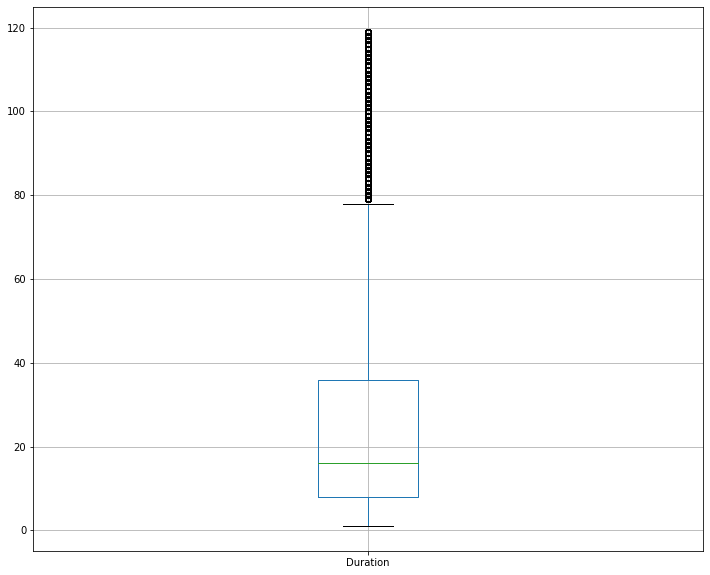

In [ ]:
# Perform boxplot on Duration column of the dataset
train.boxplot(column = 'Duration', figsize=(12,10))

from above box plot graph:

duration

25% of duration have value between range 0 to 8

25% of duration have value between range 8 to 18

25% of duration have value between range 18 to 35

25% of duration have value between range 35 to 77

The mean duration is around 18

**Mostly the duration are on the lower side of the spectrum. Means small duration trips are the common trips**


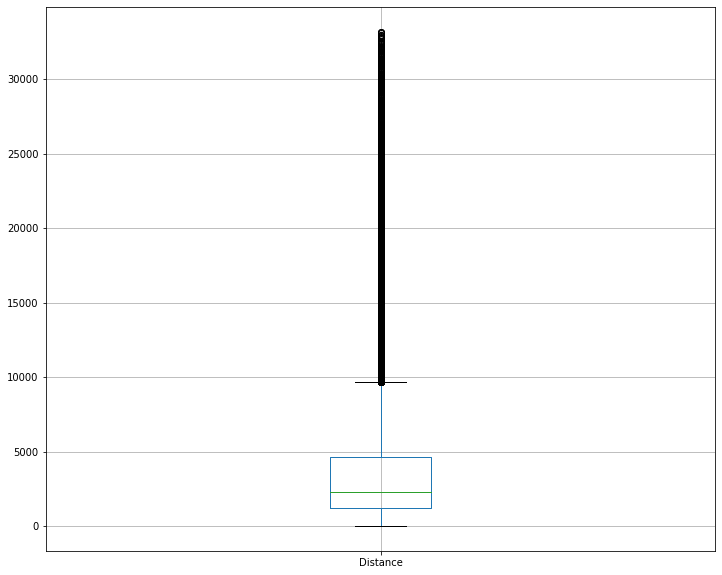

In [ ]:
# Perform boxplot on Distance column of the dataset
train.boxplot(column='Distance', figsize=(12,10))

from above box plot graph:

distance

25% of distance have value between range 0 to 1000

25% of distance have value between range 1000 to 2500

25% of distance have value between range 2500 to 4900

25% of distance have value between range 4900 to 9900

The mean distance is around 2500

 Mostly the distance are on the lower side of the spectrum. Means small distance trips are the common trips



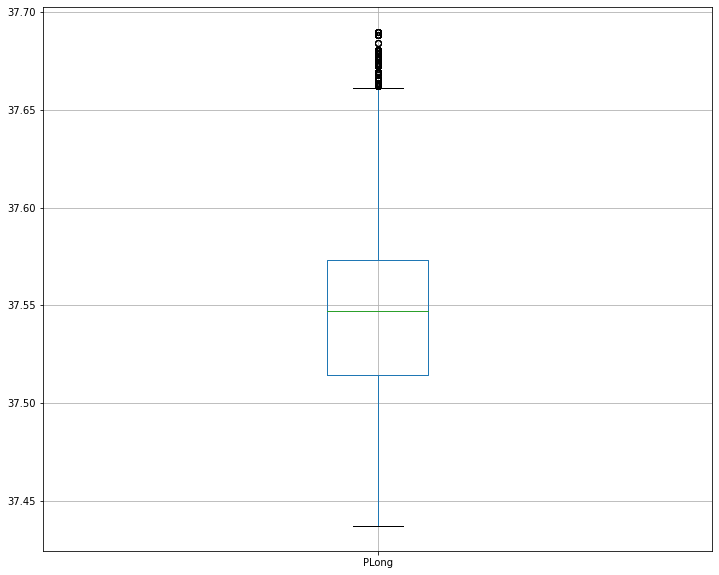

In [ ]:
# Perform boxplot on PLong column of the dataset
train.boxplot(column='PLong', figsize=(12,10))

from above box plot graph:

PLong

25% of PLong have value between range 37.44 to 37.52

25% of PLong have value between range 37.52 to 37.559

25% of PLong have value between range 37.559 to 37.58

25% of PLong have value between range 37.58 to 37.66

The mean PLong is around 37.559

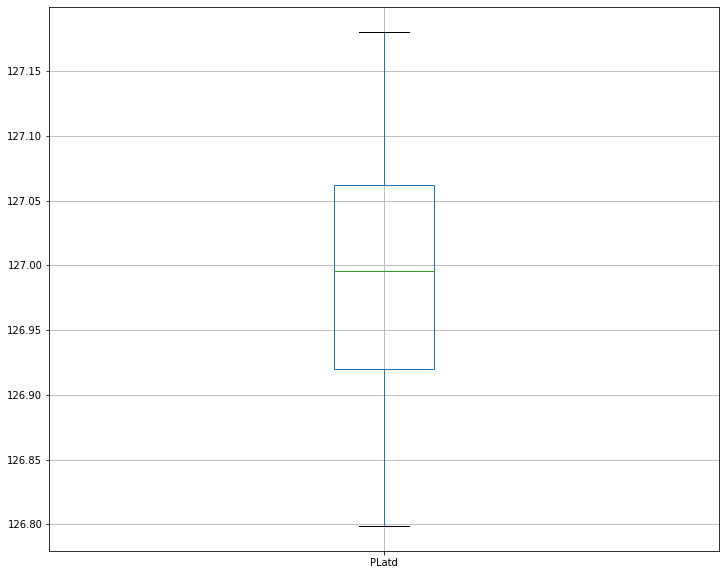

In [ ]:
# Perform boxplot on PLatd column of the dataset
train.boxplot(column='PLatd', figsize=(12,10))

from above box plot graph:

PLatd

25% of PLatd have value between range 126.80 to 162.92

25% of PLatd have value between range 126.92 to 126.99

25% of PLatd have value between range 126.99 to 127.07

25% of PLatd have value between range 127.07 to 127.18

The mean PLatd is around 126.99

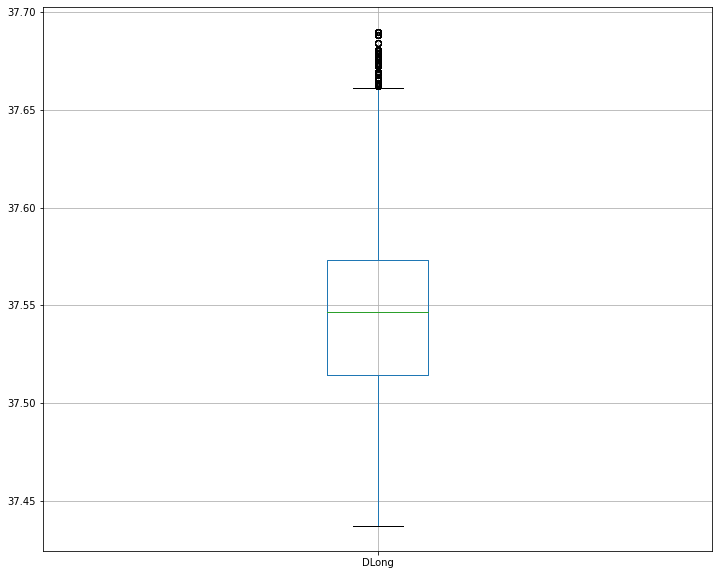

In [ ]:
# Perform boxplot on Dlong column of the dataset
train.boxplot(column='DLong', figsize=(12,10))

from above box plot graph:

DLong

25% of DLong have value between range 37.43 to 37.52

25% of DLong have value between range 37.52 to 37.545

25% of DLong have value between range 37.545 to 37.575

25% of DLong have value between range 37.575 to 37.665

The mean DLong is around 37.545

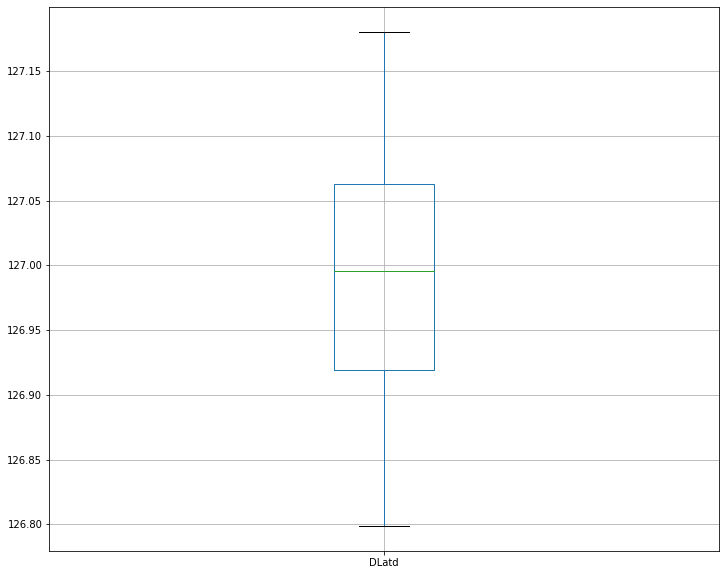

In [ ]:
# Perform boxplot on DLatd column of the dataset
train.boxplot(column='DLatd', figsize=(12,10))

from above box plot graph:

DLatd

25% of DLatd have value between range 126.80 to 126.92

25% of DLatd have value between range 126.92 to 126.995

25% of DLatd have value between range 126.995 to 127.055

25% of DLatd have value between range 127.055 to 127.175

The mean DLatd is around 126.995

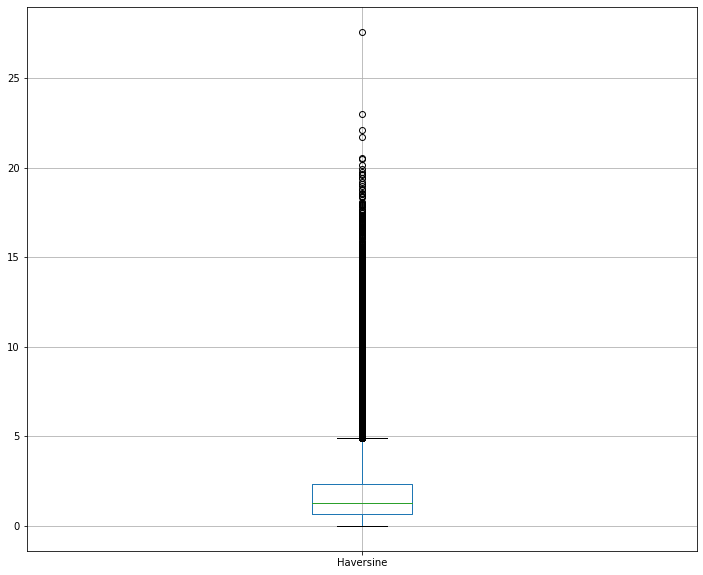

In [ ]:
# Perform boxplot on Haversine column of the dataset
train.boxplot(column='Haversine', figsize=(12,10))

from above box plot graph:

haversine

25% of haversine have value between range 0 to 0.25

25% of haversine have value between range 0.25 to 1

25% of haversine have value between range 1 to 2.5

25% of haversine have value between range 2.5 to 5

The mean haversine is around 1

Observation: Mostly the haversine are on the lower side of the spectrum. Means small distance trips are the common trips

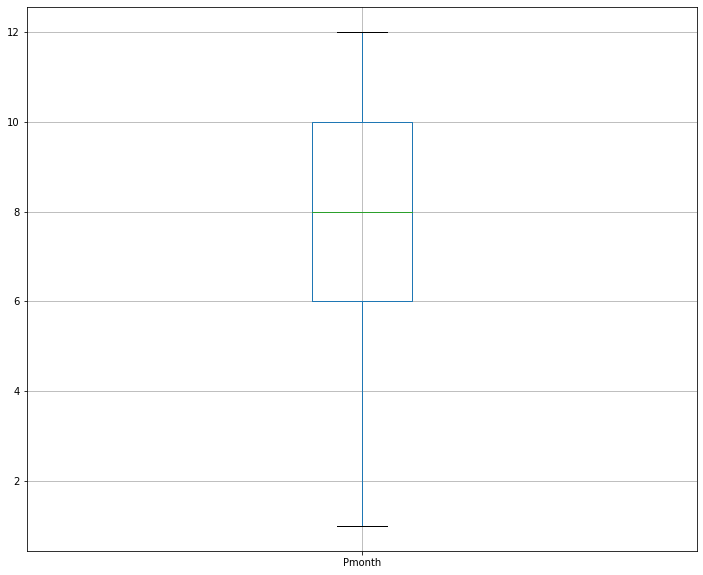

In [ ]:
# Perform boxplot on pmonth column of the dataset
train.boxplot(column='Pmonth', figsize=(12,10))

from above box plot graph:

Pmonth

25% of Pmonth have value between range 1 to 6

25% of Pmonth have value between range 6 to 8

25% of Pmonth have value between range 8 to 10

25% of Pmonth have value between range 10 to 12

The mean Pmonth is around 8

more pickups are in the month which are at the end of the year

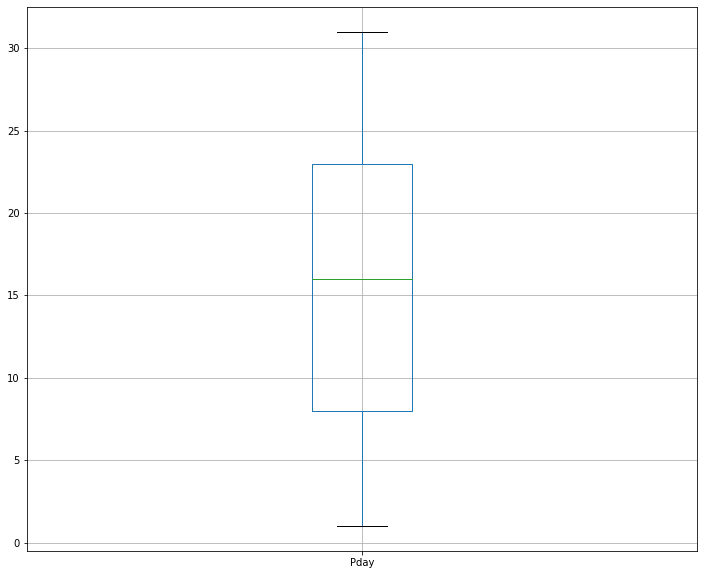

In [ ]:
# Perform boxplot on Pday column of the dataset
train.boxplot(column='Pday', figsize=(12,10))

from above box plot graph:

Pday

25% of Pday have value between range 1 to 8

25% of Pday have value between range 8 to 16

25% of Pday have value between range 16 to 23

25% of Pday have value between range 23 to 31

The mean Pday is around 16

pickups are almost same on every day of month

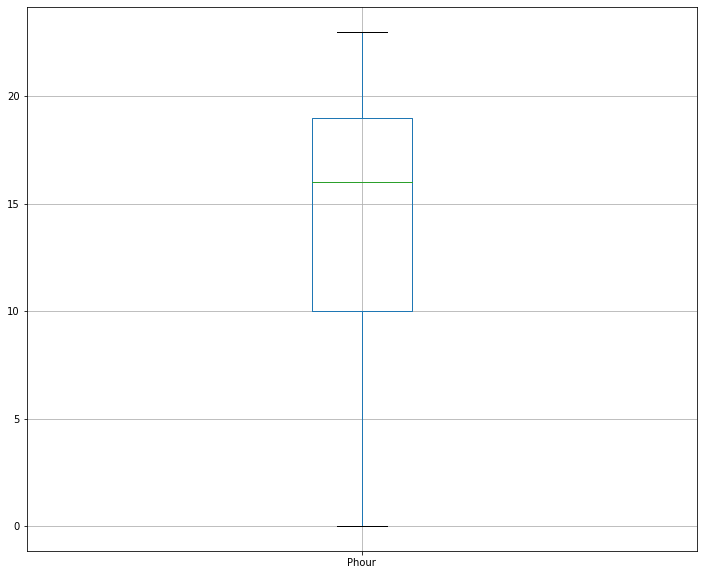

In [ ]:
# Perform boxplot on Phour column of the dataset
train.boxplot(column='Phour', figsize=(12,10))

from above box plot graph:

Phour

25% of Phour have value between range 0 to 10

25% of Phour have value between range 10 to 16

25% of Phour have value between range 16 to 19

25% of Phour have value between range 19 to 24

The mean Phour is around 16

more pickups are towards the end of the day

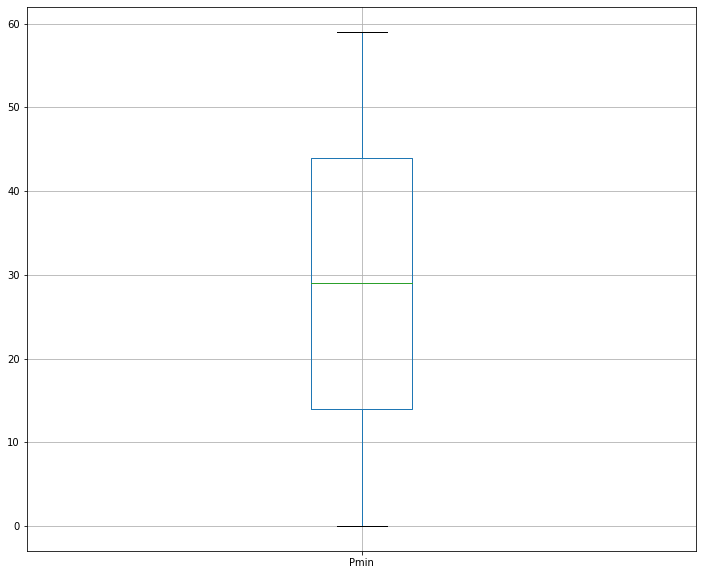

In [ ]:
# Perform boxplot on Pmin column of the dataset
train.boxplot(column='Pmin', figsize=(12,10))

from above box plot graph:

Pmin

25% of Pmin have value between range 0 to 14

25% of Pmin have value between range 14 to 29

25% of Pmin have value between range 29 to 44

25% of Pmin have value between range 44 to 60

The mean Pmin is around 29

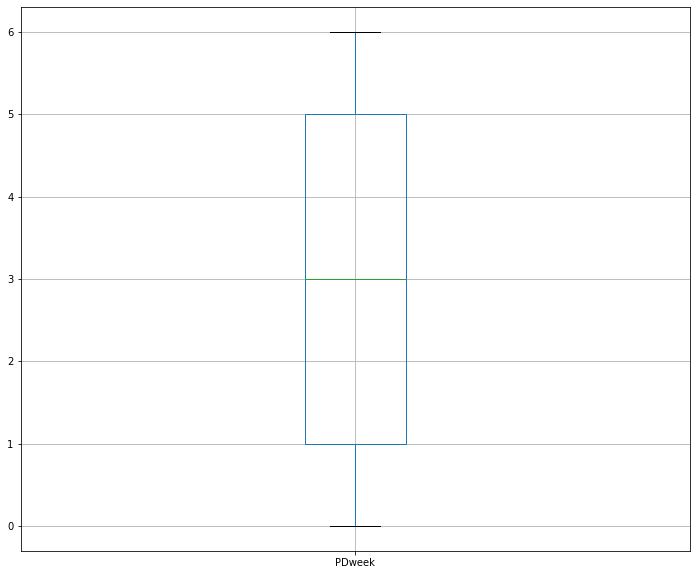

In [ ]:
# Perform boxplot on PDweek column of the dataset 
train.boxplot(column='PDweek', figsize=(12,10))

from above box plot graph:

PDweek

25% of PDweek have value between range 0 to 1

25% of PDweek have value between range 1 to 3

25% of PDweek have value between range 3 to 5

25% of PDweek have value between range 3 to 6

The mean PDweek is around 3

equal pickups throughout the week

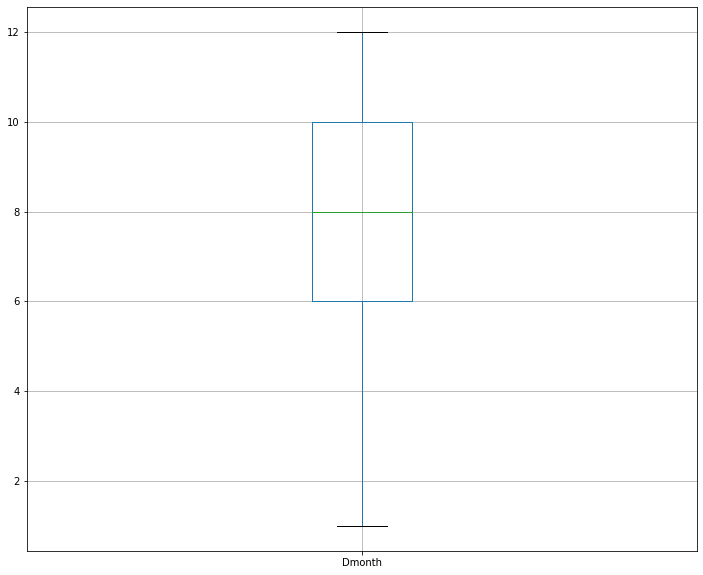

In [ ]:
# Perform boxplot on Dmonth column of the dataset
train.boxplot(column='Dmonth', figsize=(12,10))

from above box plot graph:

Dmonth

25% of Dmonth have value between range 1 to 6

25% of Dmonth have value between range 6 to 8

25% of Dmonth have value between range 8 to 10

25% of Dmonth have value between range 10 to 12

The mean Dmonth is around 8

more drop offs are towords the end months of the year

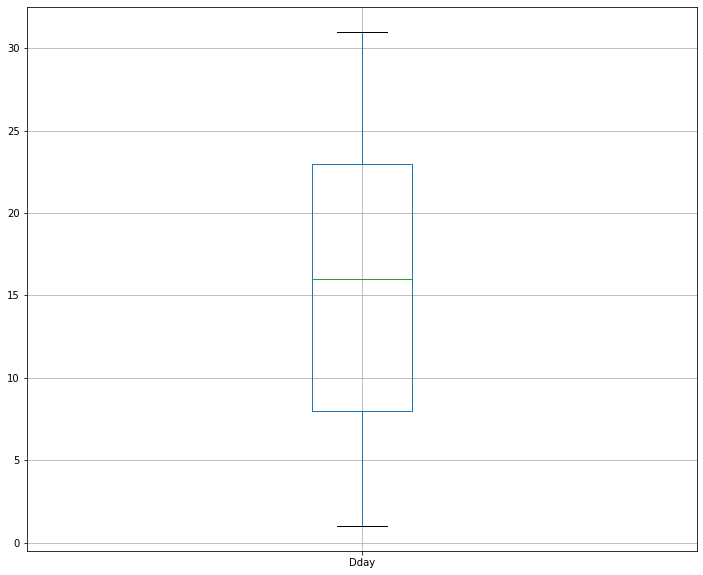

In [ ]:
# Perform boxplot on Dday column of the dataset 
train.boxplot(column='Dday', figsize=(12,10))

from above box plot graph:

Dday

25% of Dday have value between range 1 to 8

25% of Dday have value between range 8 to 16

25% of Dday have value between range 16 to 23

25% of Dday have value between range 23 to 31

The mean Dday is around 16

drops the equal throughout all the days of month

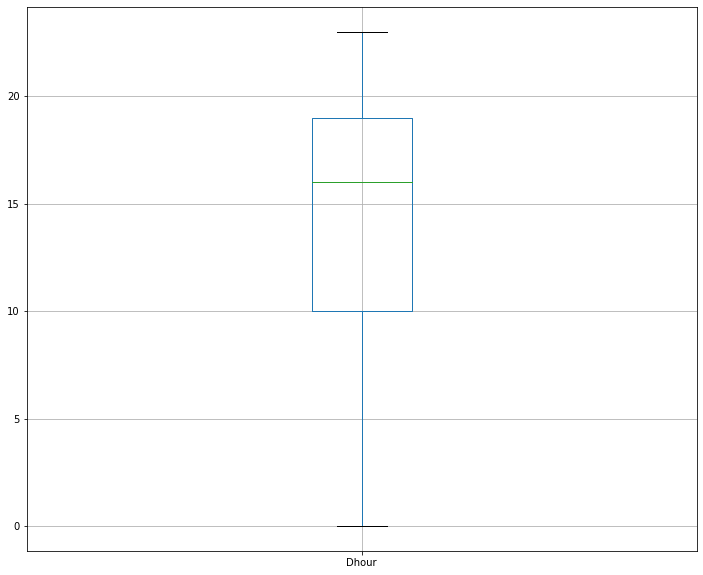

In [ ]:
# Perform boxplot on Dhour column of the dataset
train.boxplot(column='Dhour', figsize=(12,10))

from above box plot graph:

Dhour

25% of Dhour have value between range 0 to 10

25% of Dhour have value between range 10 to 16

25% of Dhour have value between range 16 to 20

25% of Dhour have value between range 20 to 24

The mean Dhour is around 16

drops offs are more towards the end hours of the day

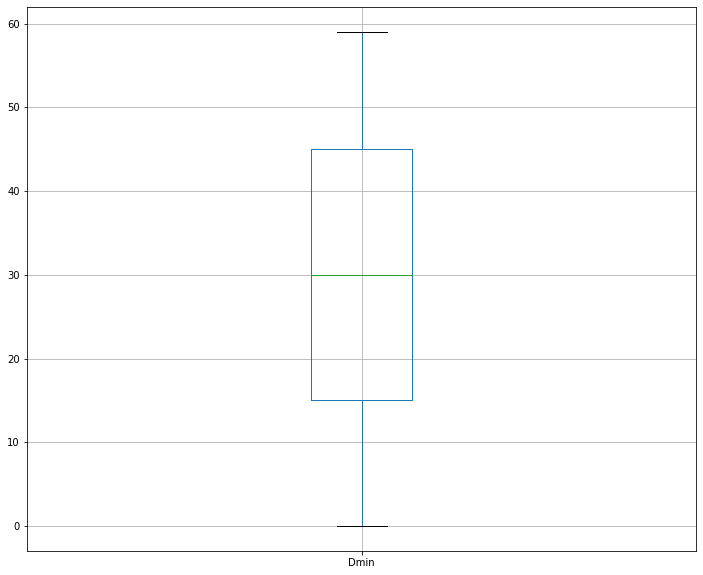

In [ ]:
# Perform boxplot on Dmin column of the dataset
train.boxplot(column='Dmin', figsize=(12,10))

from above box plot graph:

Dmin

25% of Dmin have value between range 0 to 15

25% of Dmin have value between range 15 to 30

25% of Dmin have value between range 30 to 45

25% of Dmin have value between range 45 to 60

The mean Dmin is around 30

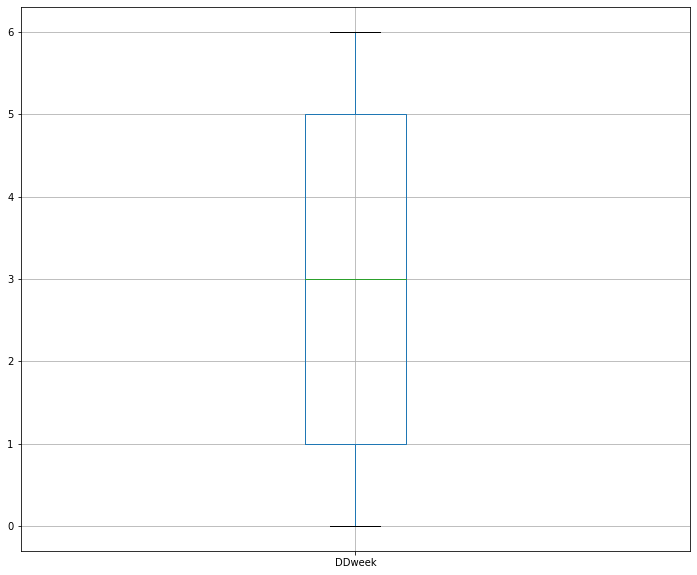

In [ ]:
# Perform boxplot on DDweek column of the dataset
train.boxplot(column='DDweek', figsize=(12,10))

from above box plot graph:

DDweek

25% of DDweek have value between range 0 to 1

25% of DDweek have value between range 1 to 3

25% of DDweek have value between range 3 to 5

25% of DDweek have value between range 5 to 6

The mean DDweek is around 3

drops are equal throughout the week

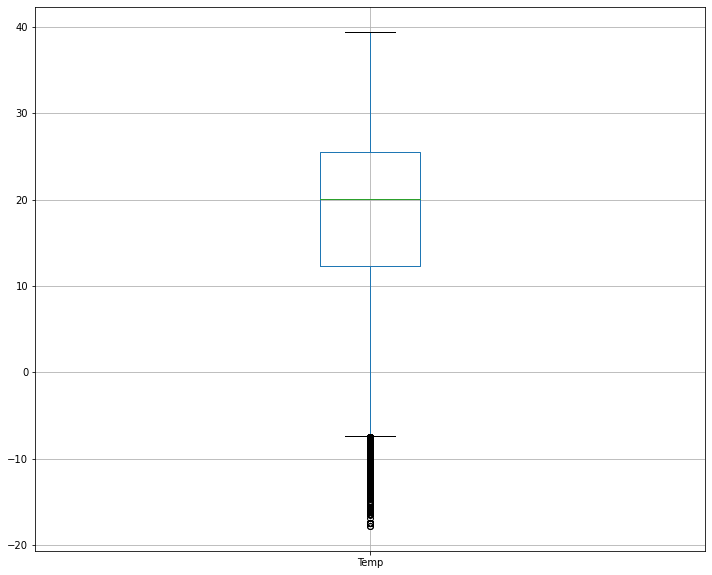

In [ ]:
# Perform boxplot on Temp column of the dataset
train.boxplot(column='Temp', figsize=(12,10))

from above box plot graph:

temperature

25% of temperature have value between range -8 to 2

25% of temperature have value between range 2 to 20

25% of temperature have value between range 20 to 26

25% of temperature have value between range 26 to 40

The mean temperature is around 20

trips are planned in slightly high temperature

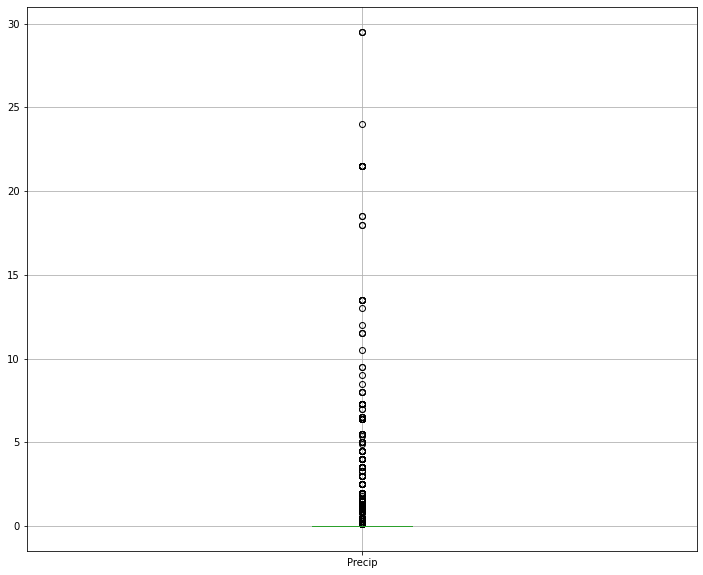

In [ ]:
# Perform boxplot on Precip column of the dataset
# Using pandas 
train.boxplot(column='Precip', figsize=(12,10))

from above box plot graph:

precip

25% of precip have value between range 0 to 0

25% of precip have value between range 0 to 0

25% of precip have value between range 0 to 0

25% of precip have value between range 0 to 0

The mean precip is around 0

more trips are planned when there is no rain or snow fall

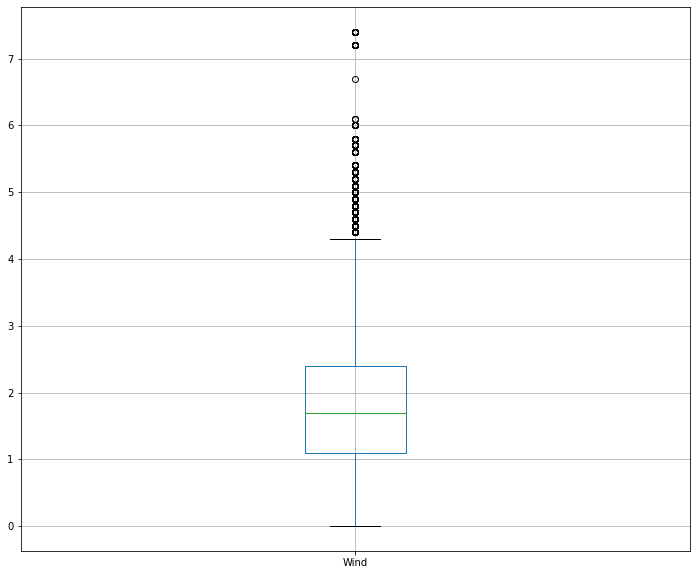

In [ ]:
# Perform boxplot on wind column of the dataset
train.boxplot(column='Wind', figsize=(12,10))

from above box plot graph:

wind

25% of wind have value between range 0 to 1.1

25% of wind have value between range 1.1 to 1.8

25% of wind have value between range 1.8 to 2.5

25% of wind have value between range 2.5 to 4.2

The mean wind is around 1.8

more trips are during less windy wheather

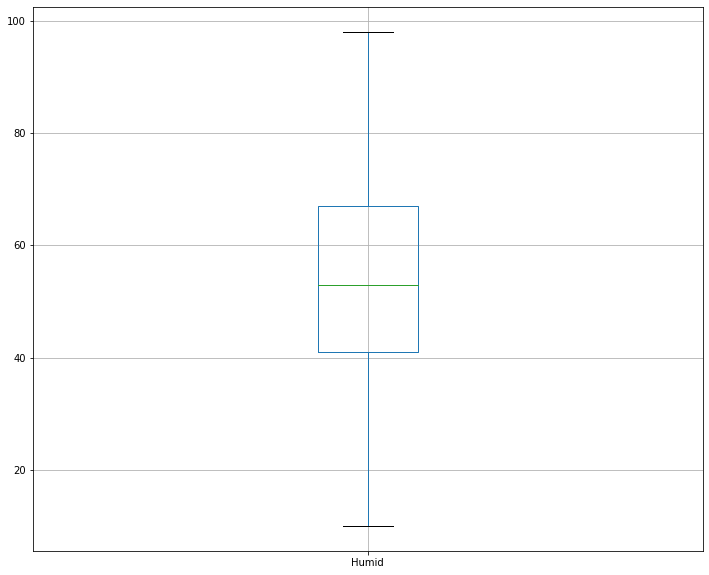

In [ ]:
# Perform boxplot on humid column of the dataset
train.boxplot(column='Humid', figsize=(12,10))

from above box plot graph:

humid

25% of humid have value between range 10 to 41

25% of humid have value between range 41 to 56

25% of humid have value between range 56 to 64

25% of humid have value between range 64 to 99

The mean humid is around 56

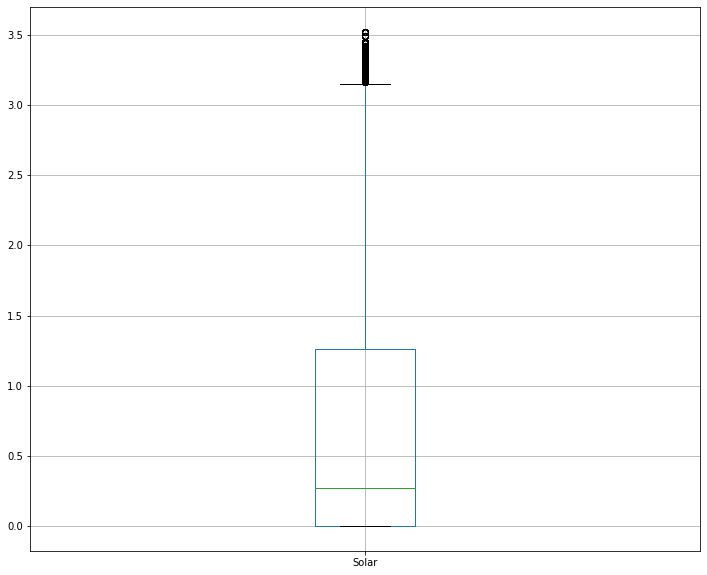

In [ ]:
# Perform boxplot on solar column of the dataset 
train.boxplot(column='Solar', figsize=(12,10))

from above box plot graph:

solar

25% of solar have value between range 0 to 0

25% of solar have value between range 0 to 0.25

25% of solar have value between range 0.25 to 1.25

25% of solar have value between range 1.25 to 3.1

The mean solar is around 0.25

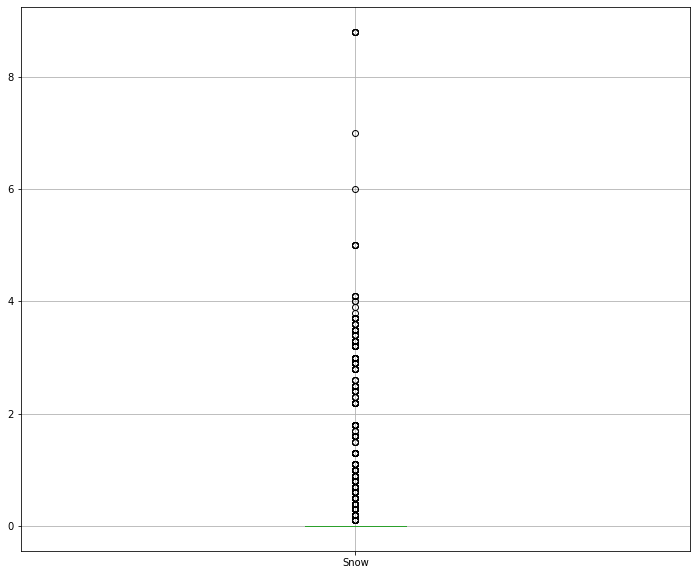

In [ ]:
# Perform boxplot on snow column of the dataset 
train.boxplot(column='Snow', figsize=(12,10))

from above box plot graph:

snow

25% of snow have value between range 0 to 0

25% of snow have value between range 0 to 0

25% of snow have value between range 0 to 0

25% of snow have value between range 0 to 0

The mean snow is around 0

more trips are during when there is no snow fall

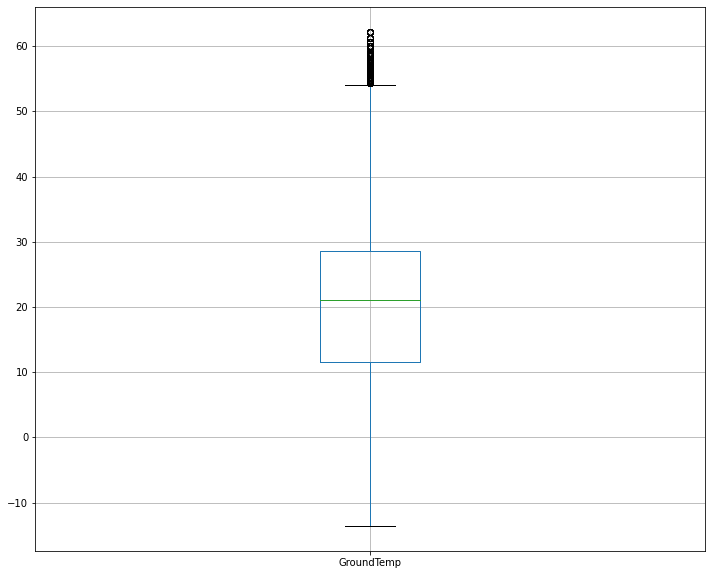

In [ ]:
# Perform boxplot on GroundTemp column of the dataset
train.boxplot(column='GroundTemp', figsize=(12,10))

from above box plot graph:

groundtemperature

25% of groundtemperature have value between range -12 to 11

25% of groundtemperature have value between range 11 to 21

25% of groundtemperature have value between range 21 to 29

25% of groundtemperature have value between range 29 to 52

The mean groundtemperature is around 21

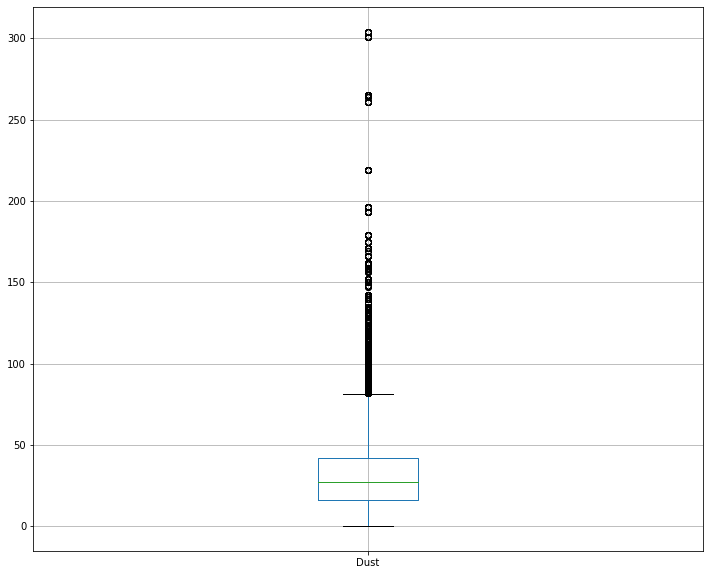

In [ ]:
# Perform boxplot on dust column of the dataset
train.boxplot(column='Dust', figsize=(12,10))

from above box plot graph:

dust

25% of dust have value between range 0 to 20

25% of dust have value between range 20 to 30

25% of dust have value between range 30 to 45

25% of dust have value between range 45 to 80

The mean dust is around 30

Observation: Mostly the dust are on the lower side of the spectrum. Means people preffer to travel in less dust concentration

## POINT PLOT


1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

In [ ]:
# Perform point plot between Phour and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Phour', y='Duration', data=train, palette='rainbow')

duration is more during morning and evening

after 8 duration is increasing and after 20 its again decreasing

In [ ]:
# Perform point plot between distance and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x='Duration', y='Distance', data=train, palette='rainbow')

duration and distance have a positive correlation between them



as duration increases distance also increases

In [ ]:
# Perform point plot between PLong and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='PLong', data=train, palette='rainbow')

as duration  increases  pickup longitude decreases

In [ ]:
# Perform point plot between PLatd and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='PLatd', data=train, palette='rainbow')

duration and PLatd has negative correlation between them.

as the value of duration increases value of PLatd decreases

In [ ]:
# Perform point plot between DLong and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='DLong', data=train, palette='rainbow')

duration and DLong has negative correlation between them.

as the value of duration increases value of DLong decreases

In [ ]:
# Perform point plot between haversine and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='Haversine', data=train, palette='rainbow')

duration and haversine are correlated 

they have positive correlation between them

In [ ]:
# Perform point plot between Pmonth and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='Pmonth', data=train, palette='rainbow')

pmonth and duration are positively correlated

as the value of duration increases value of Pmonth also increases






In [ ]:
# Perform point plot between Pday and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='Pday', data=train, palette='rainbow')

most of the points are between 14.0 and 15.0

very few are above 15.0 and below 14.0

In [ ]:
# Perform point plot between PDweek and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='PDweek', data=train, palette='rainbow')

Duration has a positive correlation with PDweek

as the value of duration increasing value of PDweek is also increasing

In [ ]:
# Perform point plot between Dmonth and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='Dmonth', data=train, palette='rainbow')

all values are between 7.5 and 7.8 

there is no relation between Dmonth and Duration

In [ ]:
# Perform point plot between Dhour and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='Dhour', data=train, palette='rainbow')

there is a positive relation between duration and Dhour 

as the value of duration increases value of Dhour also increases

In [ ]:
# Perform point plot between DDweek and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='DDweek', data=train, palette='rainbow')

there is increase in DDweek when there is increase in duration

they are correlated to each other

In [ ]:
# Perform point plot between Temp and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='Temp', data=train, palette='rainbow')

duration and templerature have a positive relation between them


In [ ]:
# Perform point plot between Precip and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='Precip', data=train, palette='rainbow')

most of the values are between 0.0 and 0.01

very few values are above 0.01

In [ ]:
# Perform point plot between wind and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='Wind', data=train, palette='rainbow')

duration and wind are correlated 

as the value of duration increases value of wind is also increasing

In [ ]:
# Perform point plot between humid and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='Humid', data=train, palette='rainbow')

duration and humidity are negatively correlated 

as the value of duration is increasing value of humidity decreases

In [ ]:
# Perform point plot between solar and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='Solar', data=train, palette='rainbow')

as the value of duration is increasing value of solar radiations is also increasing

they are correlated to each other

In [ ]:
# Perform point plot between snow and Duration values 
plt.figure(figsize=(25,6))
sns.pointplot(x='Duration', y='Snow', data=train, palette='rainbow')

snow and duration are correlated 

they have negative relation between them

In [ ]:
# Perform point plot between GroundTemp and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='GroundTemp', data=train, palette='rainbow')

ground temperature and duration are correlated to each other.

as the value of duration increases value of ground temperature also increases

In [ ]:
# Perform point plot between dust and Duration values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='Dust', data=train, palette='rainbow')

dust and duration are correlated to each other.

as the value of duration increases value of dust also increases

In [ ]:
# Perform point plot between precip and distance values 
plt.figure(figsize=(20,6))
sns.pointplot(x='Duration', y='Precip', data=train, palette='rainbow')

all the values are around 0.00

very few are above 0.00

In [ ]:
# Perform point plot between PLong and Dlong values 
plt.figure(figsize=(20,6))
sns.pointplot(x='PLong', y='DLong', data=train, palette='rainbow')

Plong and Dlong are corelated

In [ ]:
# Perform point plot between PLong and haversine values 
plt.figure(figsize=(25,6))
sns.pointplot(x='PLong', y='Haversine', data=train, palette='rainbow')

all the values are between 1 and 3

very few are above 3 and below 1

In [ ]:
# Perform point plot between PLong and Pday values 
plt.figure(figsize=(25,6))
sns.pointplot(x='PLong', y='Pday', data=train, palette='rainbow')

all the values are between 12.5 to 17.5

very few are above 17.5 and below 12.5

In [ ]:
# Perform point plot between PLong and Pmin values 
plt.figure(figsize=(20,6))
sns.pointplot(x='PLong', y='Pmin', data=train, palette='rainbow')

all the values are between 25 to 35

very few are above and below of this range

In [ ]:
# Perform point plot between PLong and PDweek values 
plt.figure(figsize=(20,6))
sns.pointplot(x='PLong', y='PDweek', data=train, palette='rainbow')

all the values are between 2 to 4

very few are above and below of this range

In [ ]:
# Perform point plot between PLong and Dday values 
plt.figure(figsize=(25,6))
sns.pointplot(x='PLong', y='Dday', data=train, palette='rainbow')

all the values are between 12 to 17

very few are above and below of this range

In [ ]:
# Perform point plot between PLong and Precip values 
plt.figure(figsize=(25,6))
sns.pointplot(x='PLong', y='Precip', data=train, palette='rainbow')

all values are around 0.00 

very few are above 0.00

In [ ]:
# Perform point plot between PLong and Humind values 
plt.figure(figsize=(20,6))
sns.pointplot(x='PLong', y='Humid', data=train, palette='rainbow')

as the distribution value of PLong is increasing the value of distribution of humidity is same

In [ ]:
# Perform point plot between PLatd and Dday values 
plt.figure(figsize=(25,6))
sns.pointplot(x='PLatd', y='Dday', data=train, palette='rainbow')

all valies are around 15

very few are above and below of 15

## COUNT PLOT

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


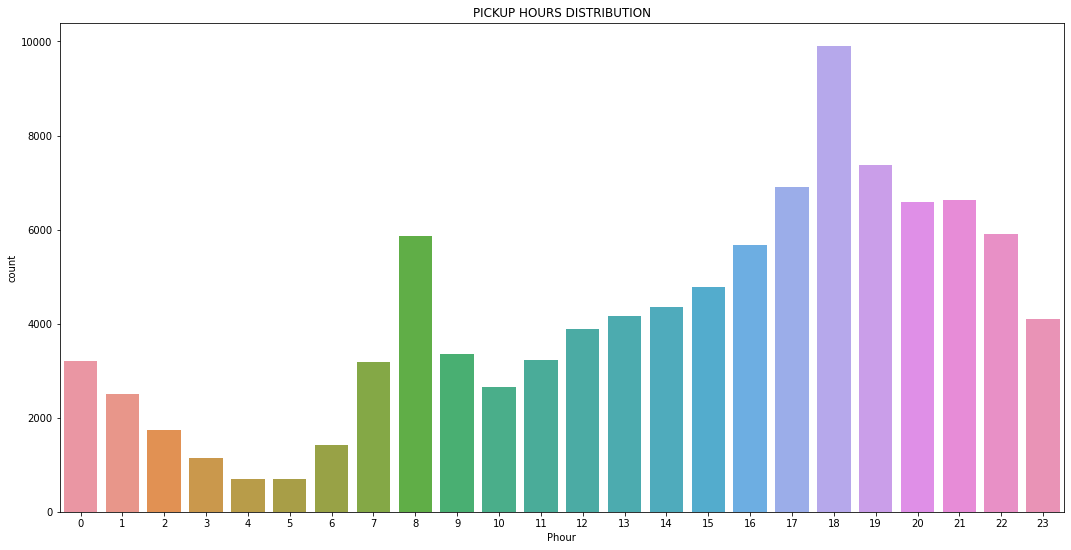

In [ ]:
# Perform the countplot on the pickup hour data
plt.figure(figsize=(18,9))
sns.countplot(x=train['Phour']).set_title('PICKUP HOURS DISTRIBUTION')
plt.show()

more pickups are on morning and evening 

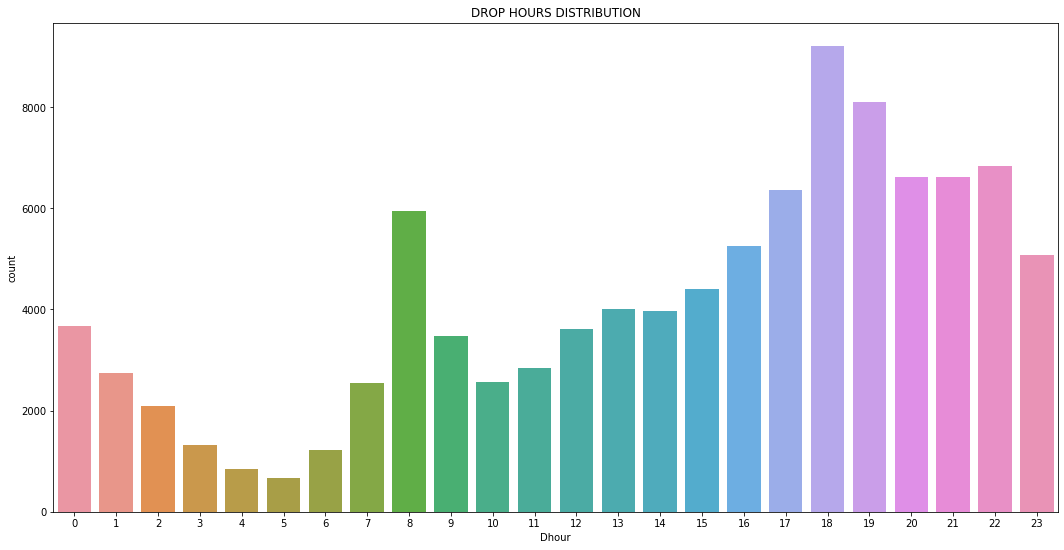

In [ ]:
# Perform the countplot on the drop hour data
plt.figure(figsize=(18,9))
sns.countplot(x=train['Dhour']).set_title('DROP HOURS DISTRIBUTION')
plt.show()

Observation:  Dropoff hour are high at the office hours both at morning and evening



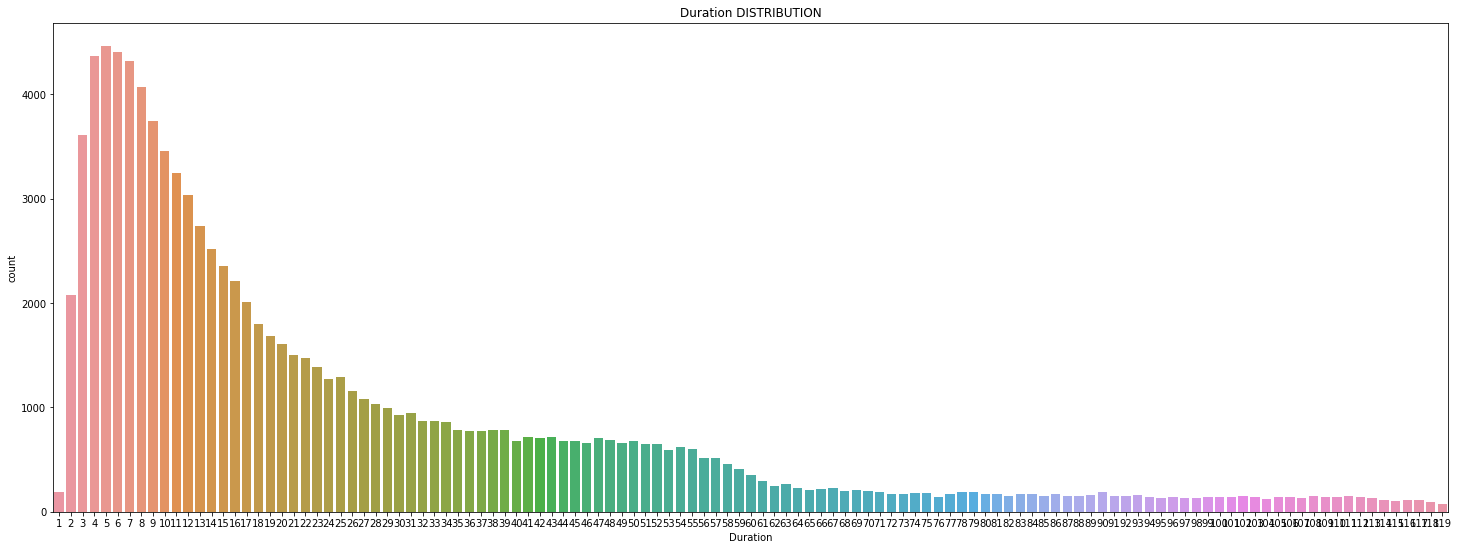

In [ ]:
# Perform the countplot on the duration data
plt.figure(figsize=(25,9))
sns.countplot(x=train['Duration']).set_title('Duration DISTRIBUTION')
plt.show();

distribution of duration is skewed left side



short duration trips are common

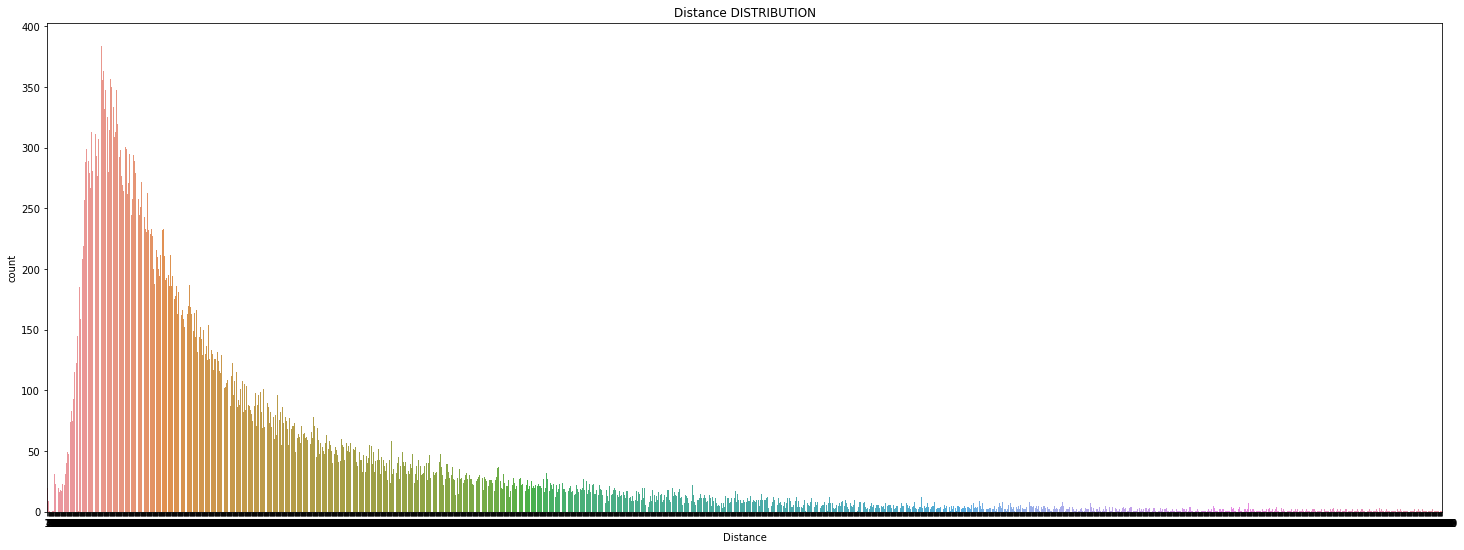

In [ ]:
# Perform the countplot on the distance data
plt.figure(figsize=(25,9))
sns.countplot(x=train['Distance']).set_title('Distance DISTRIBUTION')
plt.show();

distribution of data is skewed towards left 

short distance trips are common

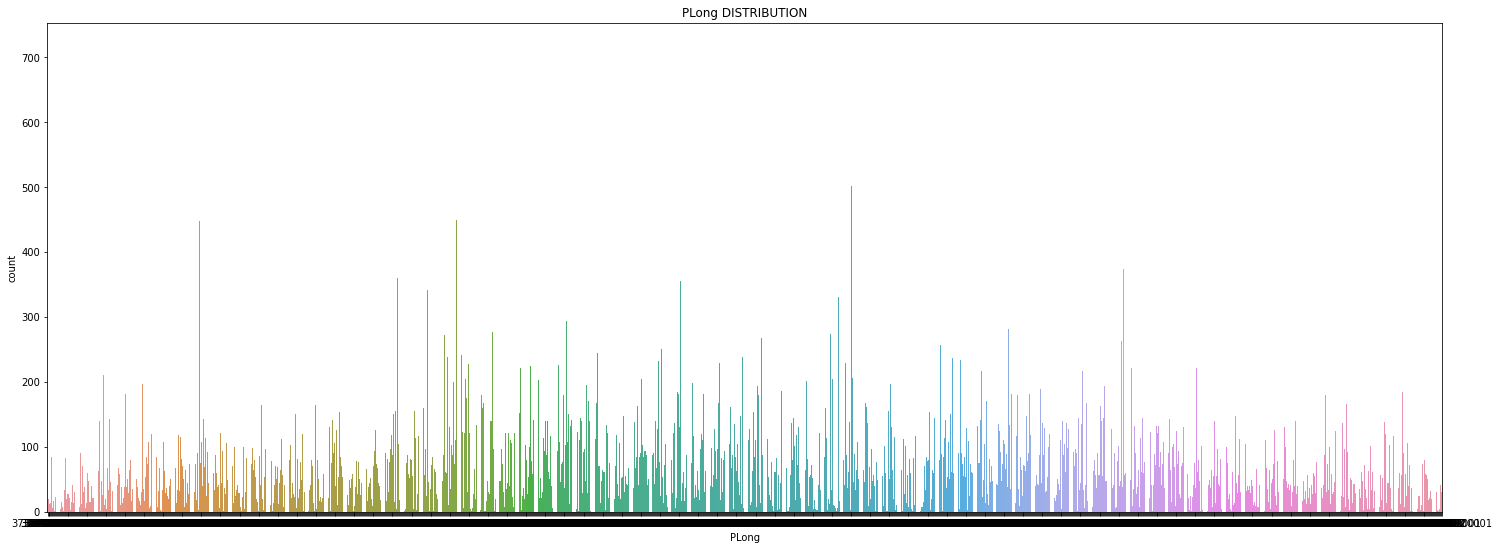

In [ ]:
# Perform the countplot on the PLong data
plt.figure(figsize=(25,9))
sns.countplot(x=train['PLong']).set_title('PLong DISTRIBUTION')
plt.show();


distribution of data is multimodal

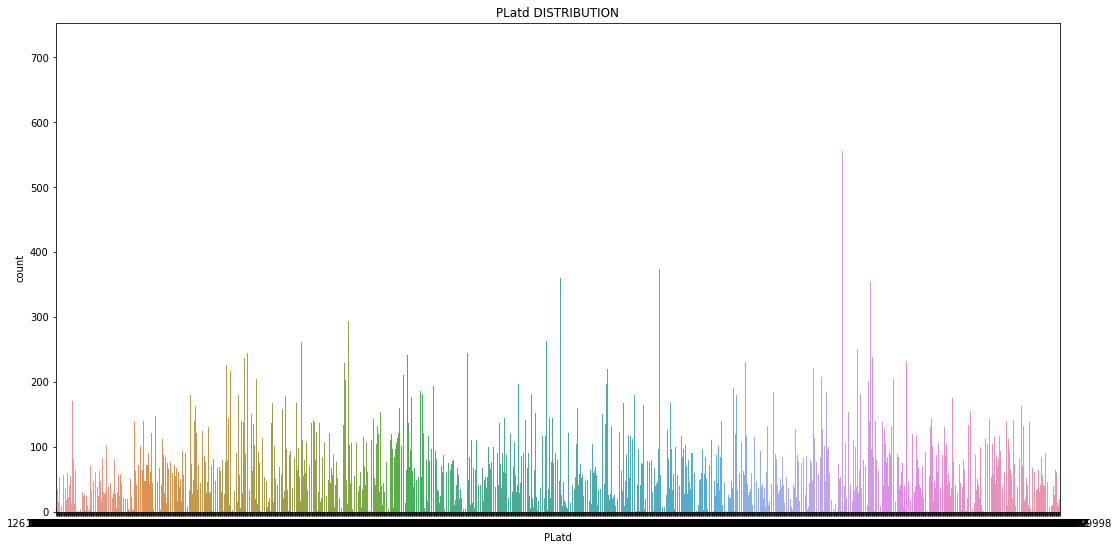

In [ ]:
# Perform the countplot on the Platd data

plt.figure(figsize=(18,9))
sns.countplot(x=train['PLatd']).set_title('PLatd DISTRIBUTION')
plt.show();

distribution of data is multimodal

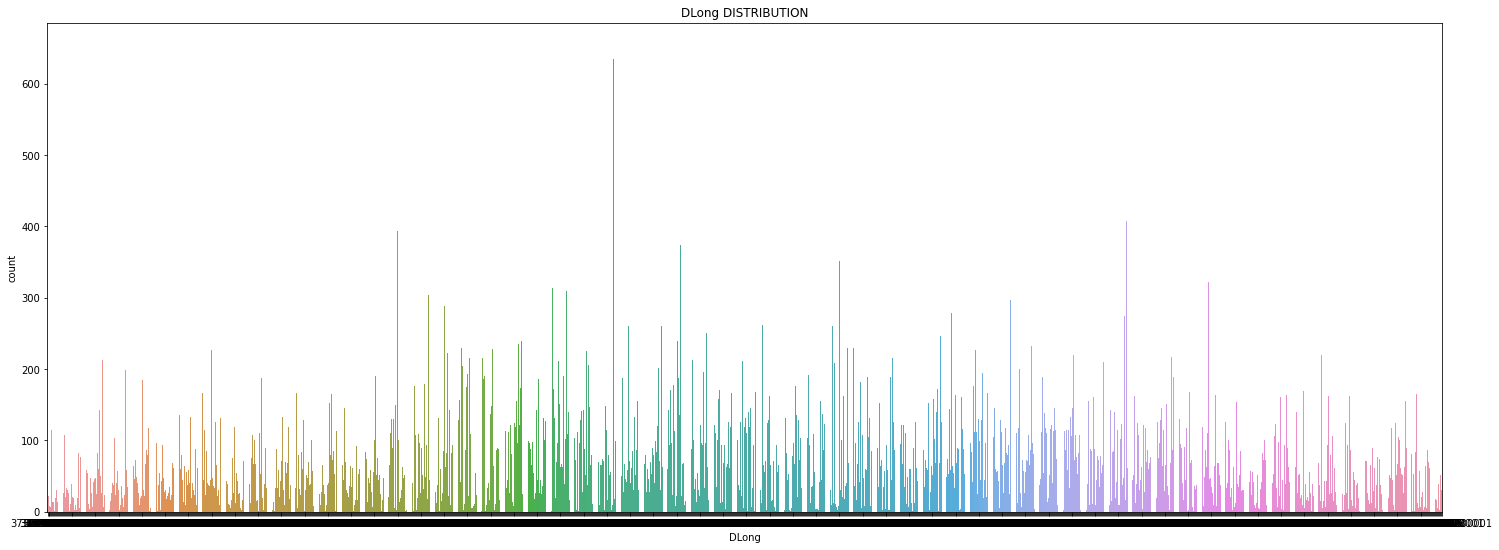

In [ ]:
# Perform the countplot on the Dlong data
plt.figure(figsize=(25,9))
sns.countplot(x=train['DLong']).set_title('DLong DISTRIBUTION')
plt.show();

distribution of data is multimodal

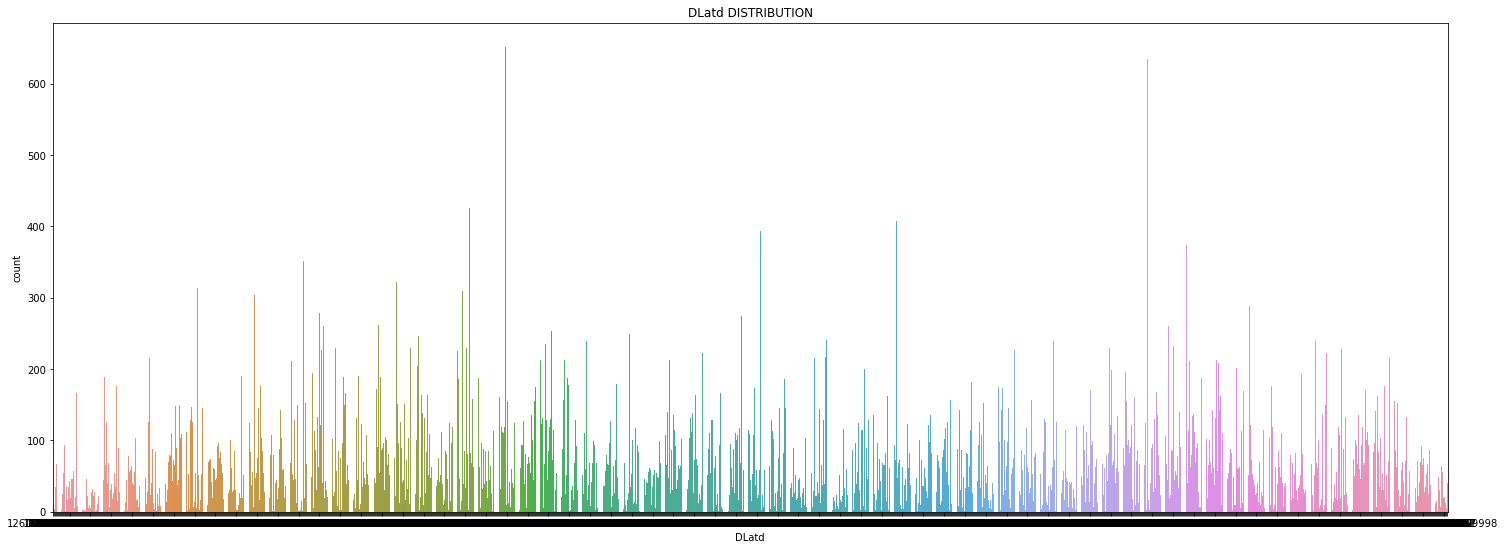

In [ ]:
# Perform the countplot on the Dlatd data
plt.figure(figsize=(25,9))
sns.countplot(x=train['DLatd']).set_title('DLatd DISTRIBUTION')
plt.show();

distribution of data is multimodal

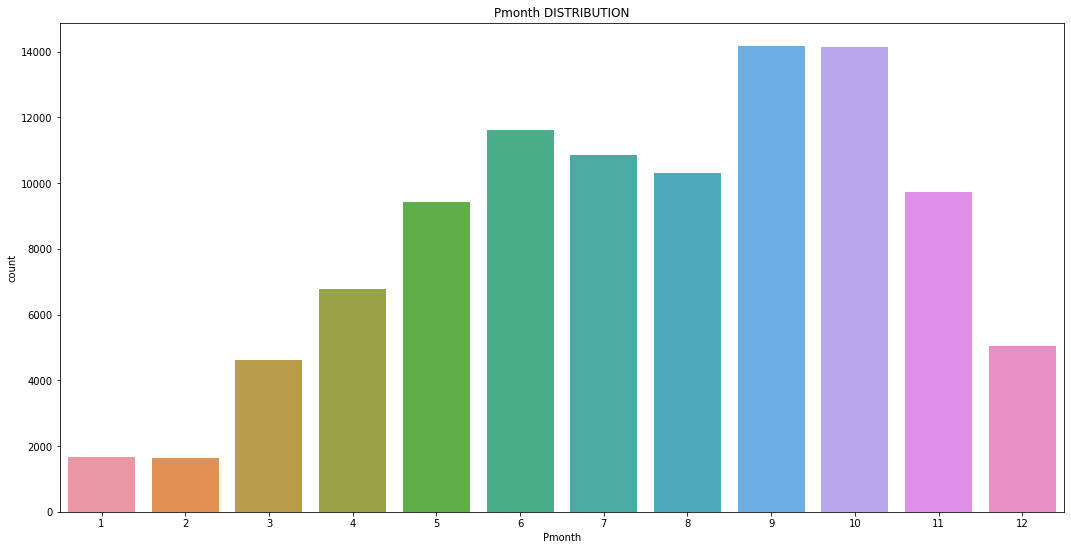

In [ ]:
# Perform the countplot on the Pmonth data
plt.figure(figsize=(18,9))
sns.countplot(x=train['Pmonth']).set_title('Pmonth DISTRIBUTION')
plt.show();

more picks are on end of the year

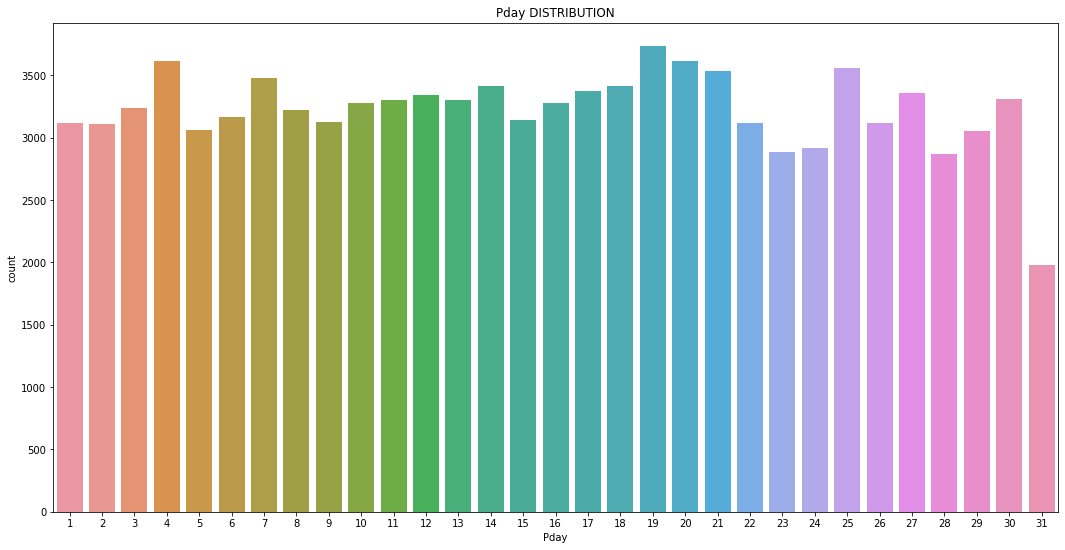

In [ ]:
# Perform the countplot on the Pday data
plt.figure(figsize=(18,9))
sns.countplot(x=train['Pday']).set_title('Pday DISTRIBUTION')
plt.show()

distribution of data is multimodal

pickups are  almost similar on every day of a month

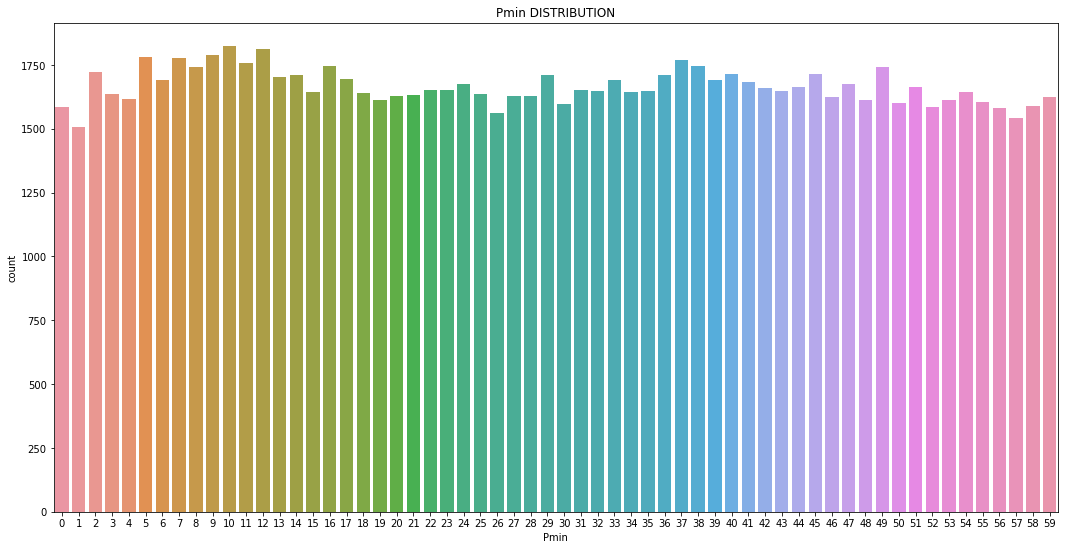

In [ ]:
# Perform the countplot on the pmin data
plt.figure(figsize=(18,9))
sns.countplot(x=train['Pmin']).set_title('Pmin DISTRIBUTION')
plt.show();

data is distributed equally

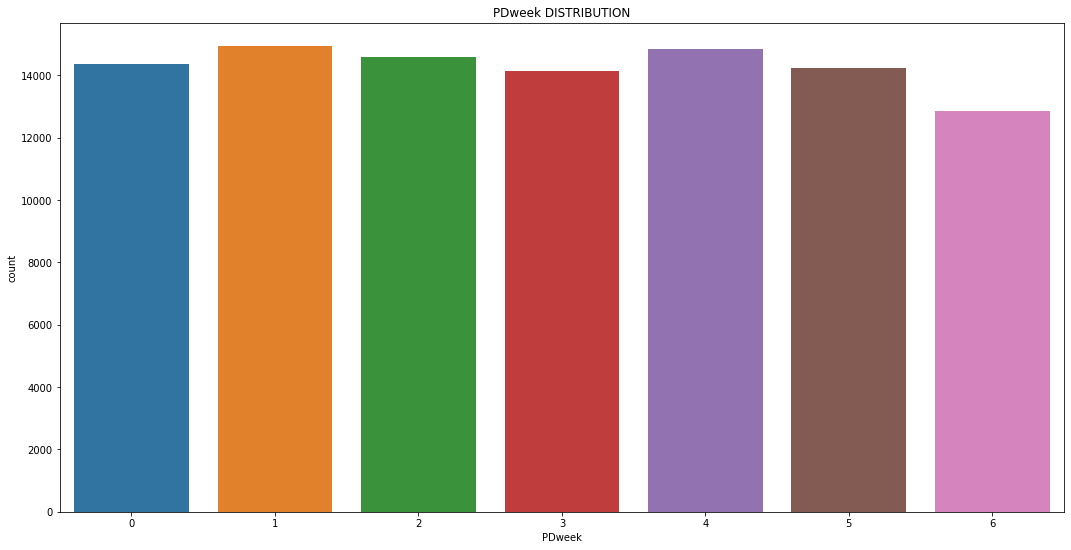

In [ ]:
# Perform the countplot on the PDweek data
plt.figure(figsize=(18,9))
sns.countplot(x=train['PDweek']).set_title('PDweek DISTRIBUTION')
plt.show();

data is distributed equally

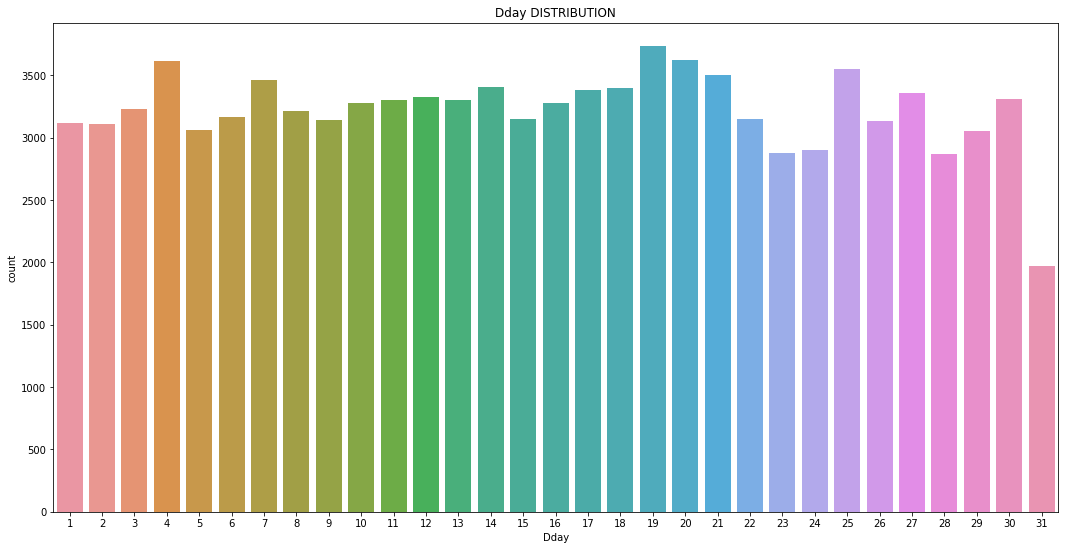

In [ ]:
# Perform the countplot on the Dday data
plt.figure(figsize=(18,9))
sns.countplot(x=train['Dday']).set_title('Dday DISTRIBUTION')
plt.show();

distribution of data is similar

drop-offs are almost similar on every day of a month

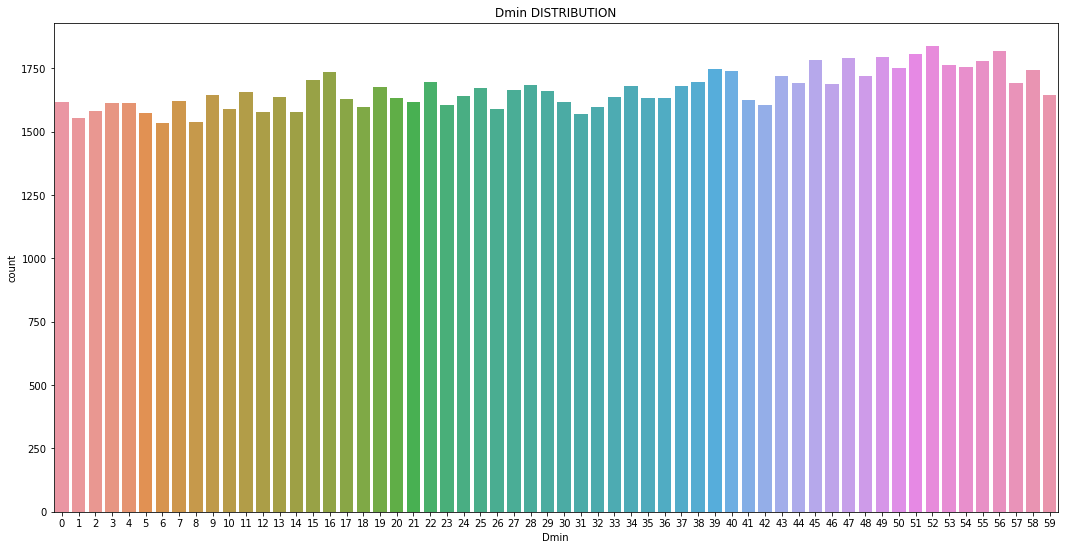

In [ ]:
# Perform the countplot on the Dmin data
plt.figure(figsize=(18,9))
sns.countplot(x=train['Dmin']).set_title('Dmin DISTRIBUTION')
plt.show();

data is distribited equally

drops on every minute of hour is similar

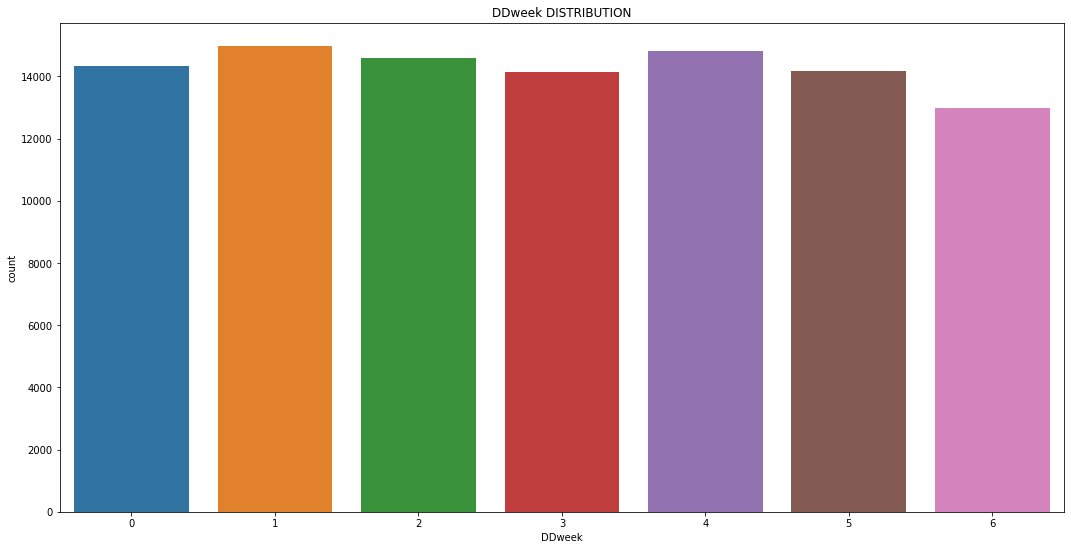

In [ ]:
# Perform the countplot on the DDweek data
plt.figure(figsize=(18,9))
sns.countplot(x=train['DDweek']).set_title('DDweek DISTRIBUTION')
plt.show();

drop offs on every day of a week are almost similar

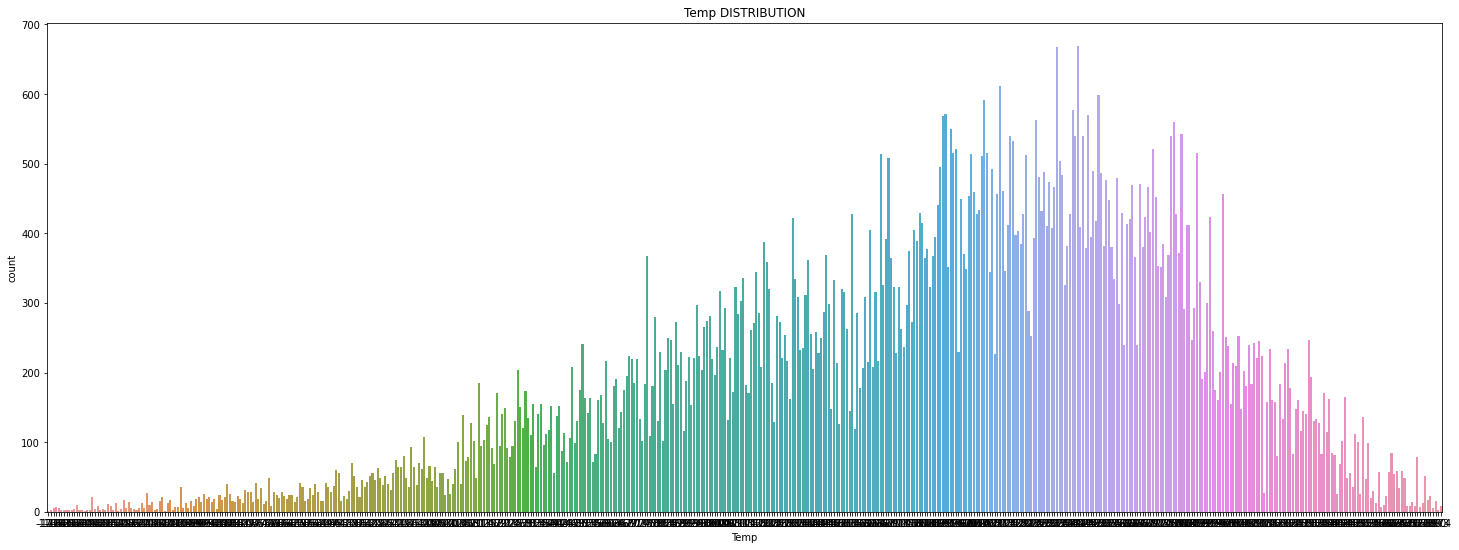

In [ ]:
# Perform the countplot on the Temp data
plt.figure(figsize=(25,9))
sns.countplot(x=train['Temp']).set_title('Temp DISTRIBUTION')
plt.show();

the distribution of data is skewed toward right

trips are avoided in less temperature

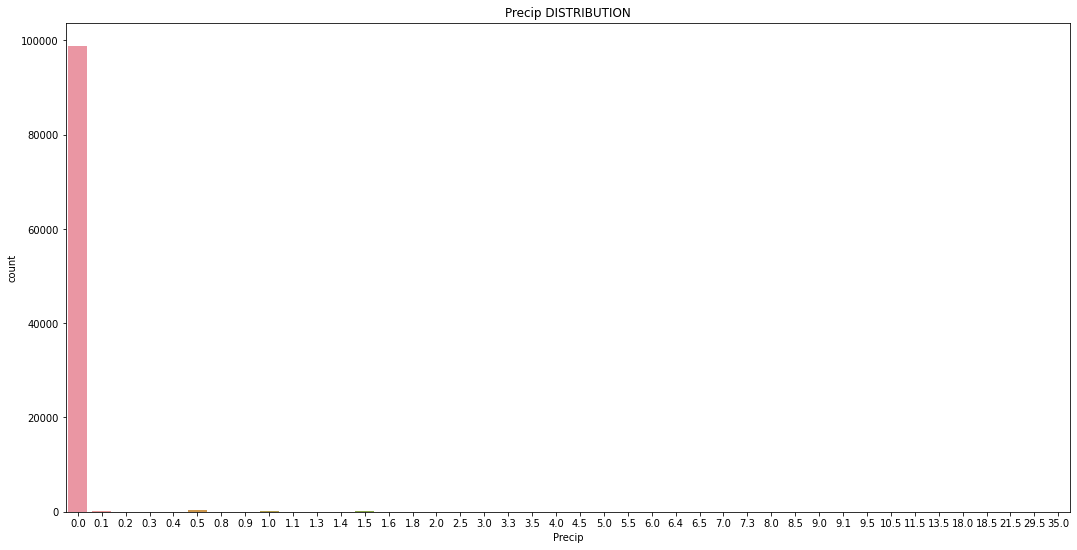

In [ ]:
# Perform the countplot on the Precip data
plt.figure(figsize=(18,9))
sns.countplot(x=train['Precip']).set_title('Precip DISTRIBUTION')
plt.show();

the distribution of data is skewed towards left

no trips are planned during rainy or snowy wheather

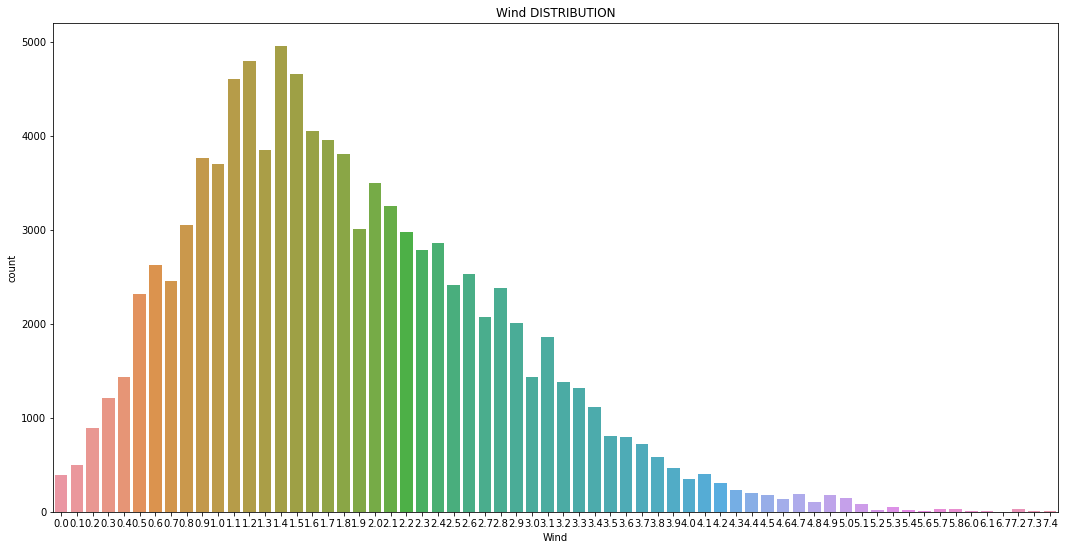

In [ ]:
# Perform the countplot on the wind data
plt.figure(figsize=(18,9))
sns.countplot(x=train['Wind']).set_title('Wind DISTRIBUTION')
plt.show();

the distribution of data is skewed towards left

trips are mostly avoided in windy wheather

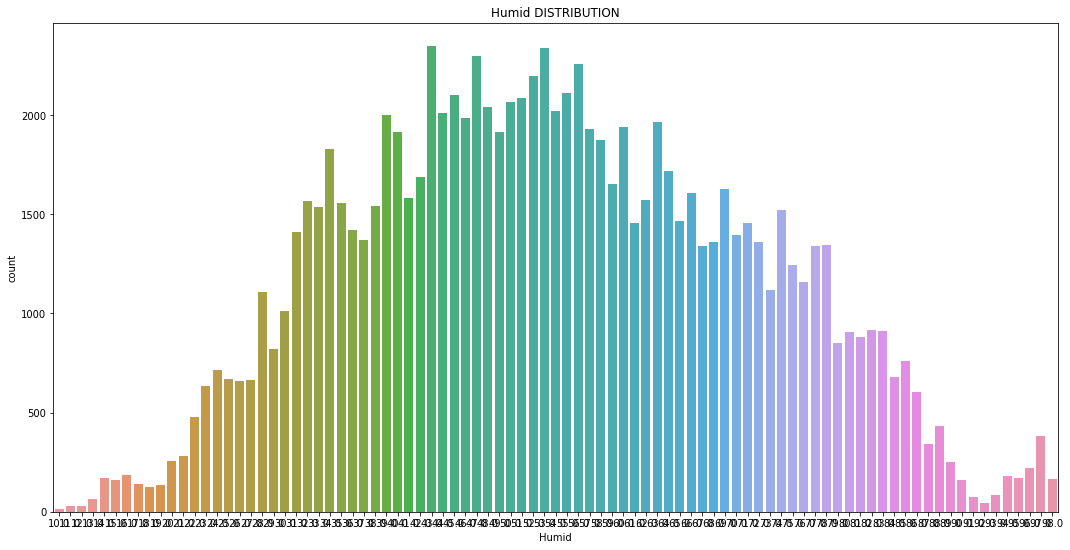

In [ ]:
# Perform the countplot on the himid hour data
plt.figure(figsize=(18,9))
sns.countplot(x=train['Humid']).set_title('Humid DISTRIBUTION')
plt.show();

people mostly avoid to go on trips on less humid or in extra humid wheather

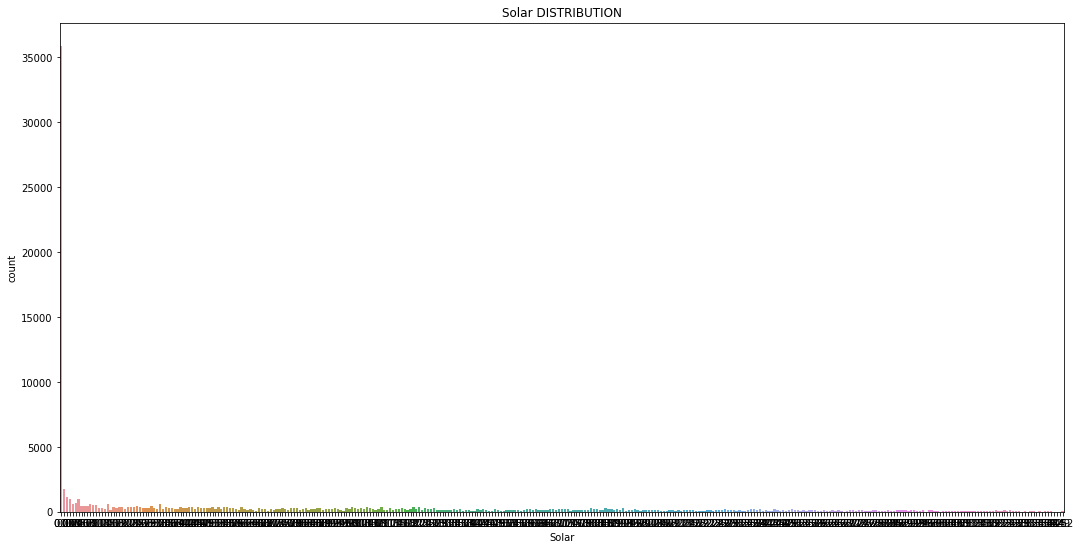

In [ ]:
# Perform the countplot on the solar data
plt.figure(figsize=(18,9))
sns.countplot(x=train['Solar']).set_title('Solar DISTRIBUTION')
plt.show();

the data distribution is skewed towards left side

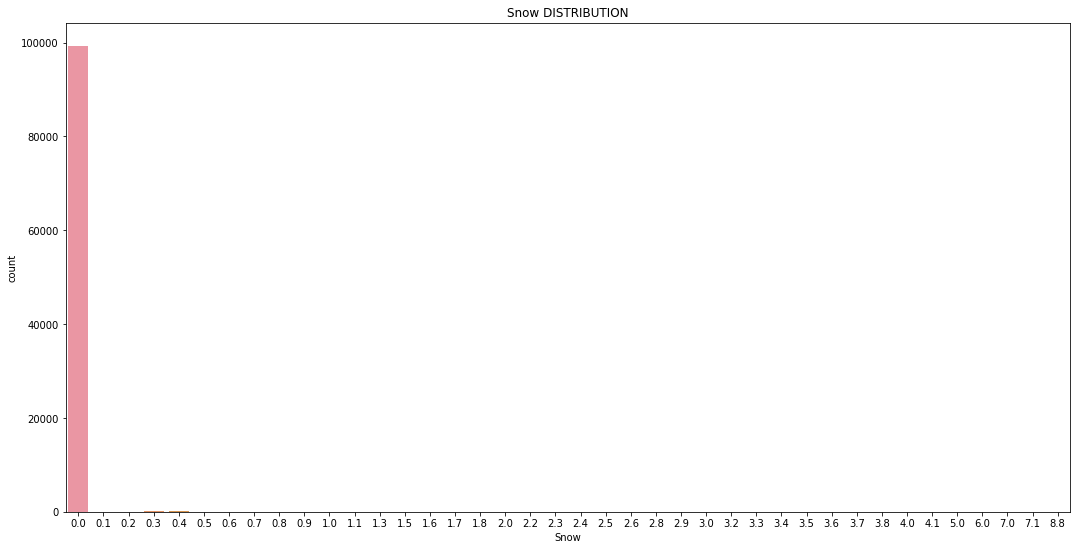

In [ ]:
# Perform the countplot on the snow data
plt.figure(figsize=(18,9))
sns.countplot(x=train['Snow']).set_title('Snow DISTRIBUTION')
plt.show();

the data distribution is skewed towards left side

more trips are during  when there is no snowfall.

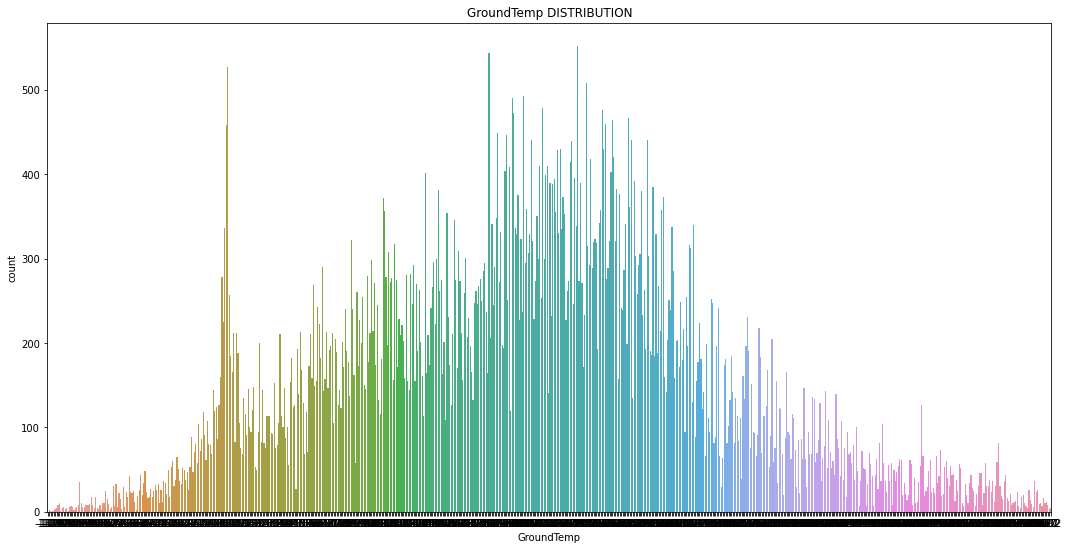

In [ ]:
# Perform the countplot on the GroundTemp data
plt.figure(figsize=(18,9))
sns.countplot(x=train['GroundTemp']).set_title('GroundTemp DISTRIBUTION')
plt.show();

the distribution of data is multimodel

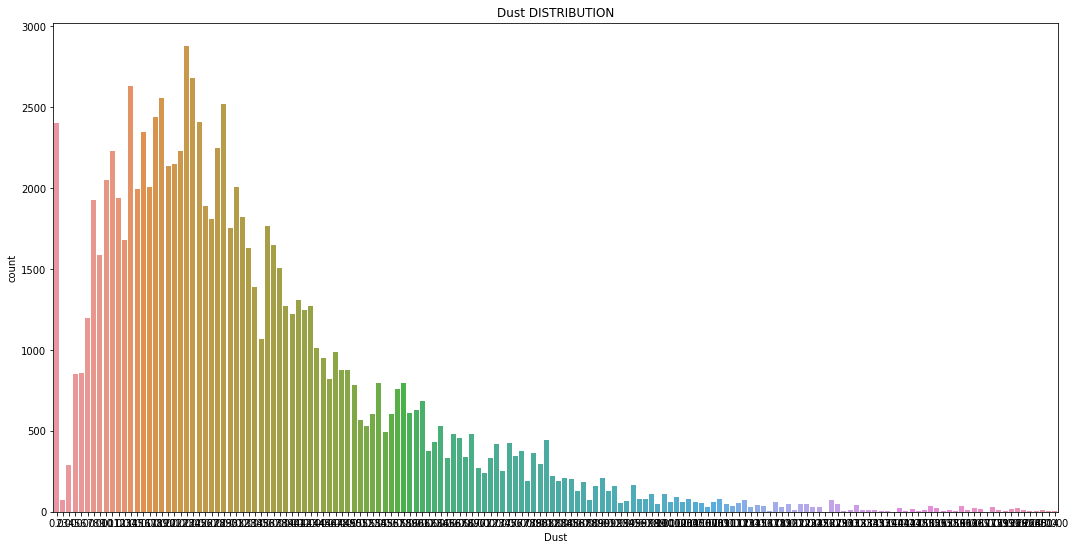

In [ ]:
# Perform the countplot on the dust data
plt.figure(figsize=(18,9))
sns.countplot(x=train['Dust']).set_title('Dust DISTRIBUTION')
plt.show();

distribution of data is skewed towards left

more trips are done when there is less dust

## Boxen Plot

The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.

In [ ]:
# Perform boxen plot between distance and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Distance', data=train, palette='rainbow');

distribution of distance is increasing as the duration  is increasing

In [ ]:
# Perform boxen plot between Duration and Plong 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='PLong', data=train, palette='rainbow');

from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
There is no relation between Plong and  Duration

In [ ]:
# Perform boxen plot between PLatd and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='PLatd', data=train, palette='rainbow');

from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
There is no relation between duration and Platd



In [ ]:
# Perform boxen plot between DLong and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='DLong', data=train, palette='rainbow');

from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
There is no relation between duration and Dlong

In [ ]:
# Perform boxen plot between Dlatd and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='DLatd', data=train, palette='rainbow');

from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and Dlatd

In [ ]:
# Perform boxen plot between Pday and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Pday', data=train, palette='rainbow');

from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and pday

In [ ]:
# Perform boxen plot between Phour and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Phour', data=train, palette='rainbow');

there is weak relation between duration and Phours

In [ ]:
# Perform boxen plot between Pmin and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Pmin', data=train, palette='rainbow');

from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and Pmin

In [ ]:
# Perform boxen plot between Dday and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Dday', data=train, palette='rainbow');

from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and Dday

In [ ]:
# Perform boxen plot between Dhour and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Dhour', data=train, palette='rainbow');

there is weak relation between duration and Dhour

In [ ]:
# Perform boxen plot between Dmin and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Dmin', data=train, palette='rainbow');

there is no relation between duration and Dmin

In [ ]:
# Perform boxen plot between Dday and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Dday', data=train, palette='rainbow');

from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and Dday

In [ ]:
# Perform boxen plot between Dmin and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Dmin', data=train, palette='rainbow');

there is no relation between duration and Dmin

In [ ]:
# Perform boxen plot between temp and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Temp', data=train, palette='rainbow');

there is positive relation between duration and temperature

In [ ]:
# Perform boxen plot between precip and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Precip', data=train, palette='rainbow');

no relation between duration and precipitation

In [ ]:
# Perform boxen plot between wind and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Wind', data=train, palette='rainbow');

from above boxen plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. There is no relation between duration and wind

In [ ]:
# Perform boxen plot between humid and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Humid', data=train, palette='rainbow');

duration and humidity have weak correlation between them

In [ ]:
# Perform boxen plot between solar and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Solar', data=train, palette='rainbow');

solar raditation and duration are correlated to eachother.

as the solar radiation increases duration also increases

In [ ]:
# Perform boxen plot between snow and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Snow', data=train, palette='rainbow');

no relation between snow and duration

In [ ]:
# Perform boxen plot between GroundTemp and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='GroundTemp', data=train, palette='rainbow');

duration and ground temperature are correlated

In [ ]:
# Perform boxen plot between dust and Duration 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Duration', y='Dust', data=train, palette='rainbow');

there is not much difference in the value of dust as duration increases.

there is weak relation between duration and dust.

In [ ]:
# Perform boxen plot between distance and haversine 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Distance', y='Haversine', data=train, palette='rainbow');

there is weak relation between distance and haversine

In [ ]:
# Perform boxen plot between distance and Pmonth 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Distance', y='Pmonth', data=train);

there is no relation between distance and Pmonth

In [ ]:
# Perform boxen plot between distance and Pday 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Distance', y='Pday', data=train, palette='rainbow');

no relation between distance Pday

In [ ]:
# Perform boxen plot between distance and Pmin 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Distance', y='Pmin', data=train, palette='rainbow');

there is no relation between distance and Pmin

In [ ]:
# Perform boxen plot between distance and PDweek 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Distance', y='PDweek', data=train, palette='rainbow');

there is no relation between distance and PDweek

In [ ]:
# Perform boxen plot between distance and Dmonth 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Distance', y='Dmonth', data=train, palette='rainbow');

there is no relation bertween distance and Dmonth

In [ ]:
# Perform boxen plot between distance and Dday 
plt.figure(figsize=(25,10))
sns.boxenplot(x='Distance', y='Dday', data=train, palette='rainbow');

there is no relation between distance and Dday

## DENDOGRAM

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

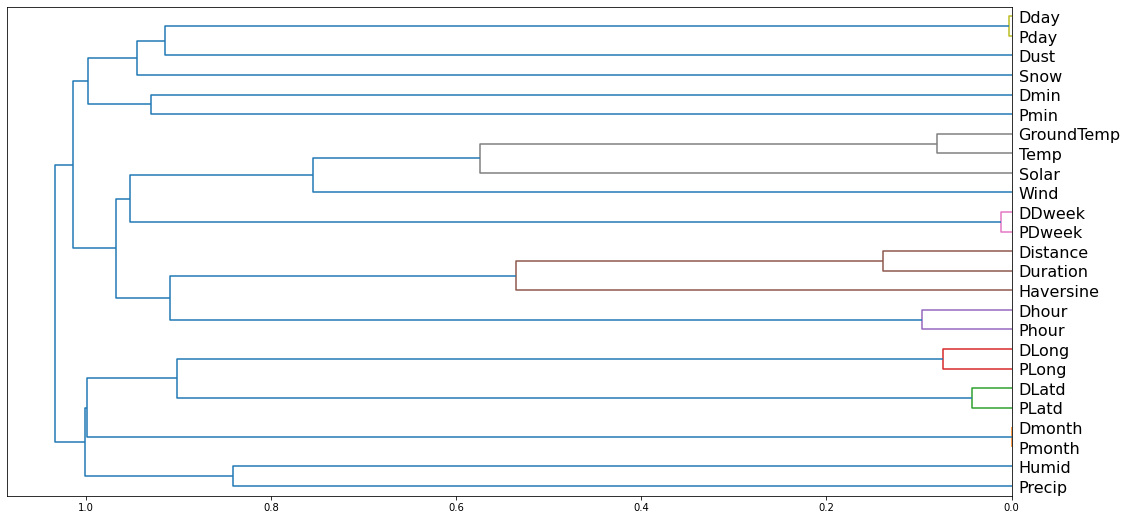

In [ ]:
from seaborn.matrix import dendrogram
# Plot a Dendrogram on the columns of the dataset
import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(train).correlation, 4)
corr_condensed = hc.distance.squareform(1 - corr)
z = hc.linkage(corr_condensed, method='average')
fig= plt.figure(figsize=(18,9))
dendrogram = hc.dendrogram(z,labels=train.columns, orientation='left', leaf_font_size=16)
plt.show()


Observation: All connected are compoundly related to each other like latitudes to longitudes, distance to duration and many more.

## Violin Plot

1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

In [ ]:
# Perform violin plot between distance and Duration 
plt.figure(figsize=(28,10))
sns.violinplot(x='Duration', y='Distance', data=train);

Distance and duration arecorrelated

as duration increases distance also increases

In [ ]:
# Perform violin plot between PLong and Duration 
plt.figure(figsize=(28,10))
sns.violinplot(x='Duration', y='PLong', data=train);

from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
There is no relation between duration and PLong 

In [ ]:
# Perform violin plot between Platd and Duration 
plt.figure(figsize=(28,10))
sns.violinplot(x='Duration', y='PLatd', data=train);

from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.

There is no relation between duration and PLatd 

In [ ]:
# Perform violin plot between Dlong and Duration 
plt.figure(figsize=(28,10))
sns.violinplot(x='Duration', y='DLong', data=train);

Dlong distribution for all values of duration is simmilar.

there is no relation between DLong and duration.

In [ ]:
# Perform violin plot between DLatd and Duration 
plt.figure(figsize=(28,10))
sns.violinplot(x='Duration', y='DLatd', data=train);

from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical.
There is no relation between duration and DLatd 

In [ ]:
# Perform violin plot between Pmin and Duration 
plt.figure(figsize=(28,10))
sns.violinplot(x='Duration', y='Pmin', data=train);

from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. 

There is no relation between duration and Pmin

In [ ]:
# Perform violin plot between Dhour and Duration 
plt.figure(figsize=(28,10))
sns.violinplot(x='Duration', y='Dhour', data=train);

from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. 

There is no relation between duration and Dday

In [ ]:
# Perform violin plot between Dmin and Duration 
plt.figure(figsize=(28,10))
sns.violinplot(x='Duration', y='Dmin', data=train);

Dmin distribution for all values of Duration is similar.

In [ ]:
# Perform violin plot between Precip and Duration 
plt.figure(figsize=(28,10))
sns.violinplot(x='Duration', y='Precip', data=train);

precip distribution for all values of duration is simmilar.

In [ ]:
# Perform violin plot between wind and Duration 
plt.figure(figsize=(28,10))
sns.violinplot(x='Duration', y='Wind', data=train);

wind distribution for all values of duration is simmilar.


In [ ]:
# Perform violin plot between humid and Duration 
plt.figure(figsize=(28,10))
sns.violinplot(x='Duration', y='Humid', data=train);

as duration increases there is slight change in the humidity 

humidity is decreasing as duration is increasing

In [ ]:
# Perform violin plot between solar and Duration 
plt.figure(figsize=(28,10))
sns.violinplot(x='Duration', y='Solar', data=train);

solar radiation and duration have positive correlation

as value of solar radiation increases duration also increases.

In [ ]:
# Perform violin plot between GroundTemp and Duration 
plt.figure(figsize=(28,10))
sns.violinplot(x='Duration', y='GroundTemp', data=train);

as the value of duration increases value of ground temperature also slightly increases 

there is weak correlation between ground temperature and duration.

In [ ]:
# Perform violin plot between dust and Duration 
plt.figure(figsize=(28,10))
sns.violinplot(x='Duration', y='Dust', data=train);

from above violin plot:

The distribution between lower adjacent value and upper adjacent value is symmetrical. 

There is weak relation between duration and dust

In [ ]:
# Perform violin plot between distance and Plong 
plt.figure(figsize=(28,10))
sns.violinplot(x='Distance', y='PLong', data=train);

there is no relation between PLong and Distance

In [ ]:
# Perform violin plot between distance and PLatd 
plt.figure(figsize=(28,10))
sns.violinplot(x='Distance', y='PLatd', data=train);

there is no relation between PLatd and Distance

In [ ]:
# Perform violin plot between distance and Dlong 
plt.figure(figsize=(28,10))
sns.violinplot(x='Distance', y='DLong', data=train);

there is no relation between DLatd and Distance

In [ ]:
# Perform violin plot between distance and Dlatd 
plt.figure(figsize=(28,10))
sns.violinplot(x='Distance', y='DLatd', data=train);

there is no relation between DLatd and Distance

In [ ]:
# Perform violin plot between distance and Pday
plt.figure(figsize=(28,10))
sns.violinplot(x='Distance', y='Pday', data=train);

there is no relation between Pday and Distance

## Modelling

NOTE:
The dataset has 9.6 million samples.

We have used only 100000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

In [ ]:
# Splitting data into Labels and target
X = train.drop('Duration', axis=1)
y = train['Duration']

In [ ]:
X.head()

,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3720,37.613956,127.030251,37.638706,127.015907,3.028153,9,13,3,54,...,15,3,20.9,0.0,1.7,68.0,0.00,0.0,20.0,27.0
1,2970,37.586388,126.935127,37.564541,126.927071,2.530896,11,5,13,45,...,2,0,16.8,0.0,1.1,46.0,1.71,0.0,23.2,58.0
2,980,37.464550,126.883728,37.456841,126.888344,0.949100,11,10,8,50,...,56,5,9.3,0.0,0.3,85.0,0.07,0.0,8.7,83.0
3,980,37.546307,127.049805,37.539654,127.052589,0.779438,8,1,12,17,...,23,2,36.8,0.0,1.3,39.0,2.80,0.0,54.9,37.0
4,8880,37.556610,126.898018,37.556610,126.898018,0.000000,7,27,21,17,...,16,4,30.3,0.0,1.1,75.0,0.00,0.0,30.2,28.0


In [ ]:
y

0        19
1        16
2         5
3         6
4        59
         ..
99995     4
99996     8
99997    68
99998    14
99999    41
Name: Duration, Length: 100000, dtype: int64

In [ ]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
# Check the shape of all the splitted dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75000, 24), (25000, 24), (75000,), (25000,))

In [ ]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE 
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

# Function for calculating all the relevant metrics 
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),rmse(m.predict(X_test), y_test),
           m.score(X_train, y_train),m.score(X_test, y_test),
           median_absolute_error(m.predict(X_train), y_train),median_absolute_error(m.predict(X_test), y_test),
           metrics.mean_absolute_error(m.predict(X_train), y_train),metrics.mean_absolute_error(m.predict(X_test), y_test),
          
          ]
    

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]))

In [ ]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    feature_importance_df = pd.DataFrame()
     # creating dataframe for feature name and feature importance
    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df], 
                                      axis=0, ignore_index=True)
    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x='feature_importance', 
                  y='column', 
                  order=order, 
                  ax=ax, 
                  palette='viridis', 
                  orient='h')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    # return fig, ax
    return fig, ax


# Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

RMSE-Train: 16.473716385094296
RMSE-Test: 16.20435190803901
Score-Train: 0.567833871186963
Score-Test: 0.5784189628613827
MedAE-Train: 6.856575587865393
MedAE-Test: 6.8240500385959635
MeanAE-Train: 10.073015807662866
MeanAE-Test: 10.010842481342978
CPU times: user 354 ms, sys: 223 ms, total: 578 ms
Wall time: 542 ms


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9e97f6990>)

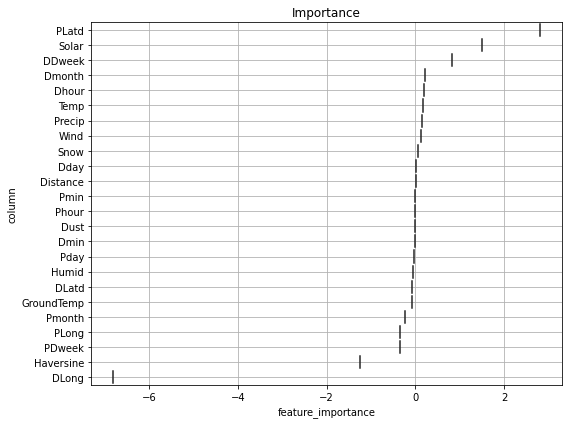

In [ ]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression

# Instantiate the model
LR = LinearRegression()

# Fit the model to the data
LR.fit(X_train, y_train)

# print score of the model
print_score(LR)

# visualizing the inportance of features.
visualize_importance(LR.coef_, X_train)

## Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

RMSE-Train: 4.918717616479591
RMSE-Test: 12.988664588478677
Score-Train: 0.9614724549322149
Score-Test: 0.7291388365308833
MedAE-Train: 1.3299999999999983
MedAE-Test: 3.66
MeanAE-Train: 2.7960297333333335
MeanAE-Test: 7.499914400000001
CPU times: user 2min 45s, sys: 766 ms, total: 2min 46s
Wall time: 2min 46s


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9e62b1310>)

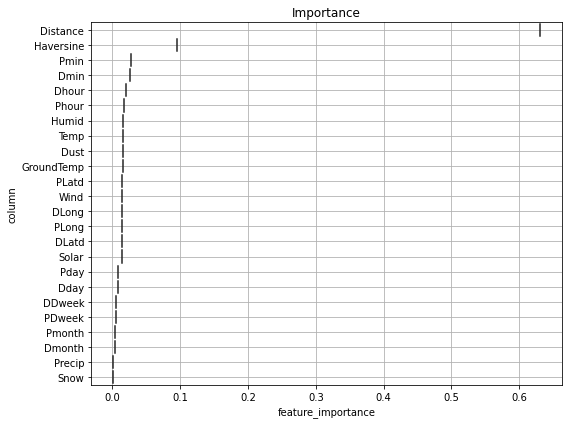

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf = RandomForestRegressor()

# Fit the model to the data
rf.fit(X_train, y_train)

# print score of the model
print_score(rf)

# visualizing the importance of features.
visualize_importance(rf.feature_importances_, X_train)

## KNeighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

In [ ]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
knn = KNeighborsRegressor()

# Fit the model to the data
knn.fit(X_train, y_train)

# print score of the model
print_score(knn)

RMSE-Train: 12.812384113297052
RMSE-Test: 15.838890617716885
Score-Train: 0.7385868340663932
Score-Test: 0.597220596058391
MedAE-Train: 3.0
MedAE-Test: 3.8000000000000007
MeanAE-Train: 7.110546666666667
MeanAE-Test: 8.83076
CPU times: user 10min 29s, sys: 28.8 s, total: 10min 57s
Wall time: 9min 18s


## Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error. it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

RMSE-Train: 12.56569561259724
RMSE-Test: 12.708780891377248
Score-Train: 0.7485563763377527
Score-Test: 0.7406862652754143
MedAE-Train: 3.7933676282440985
MedAE-Test: 3.859636318642294
MeanAE-Train: 7.373782017727065
MeanAE-Test: 7.466109388825655
CPU times: user 28.7 s, sys: 58 ms, total: 28.7 s
Wall time: 28.7 s


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9e61a6410>)

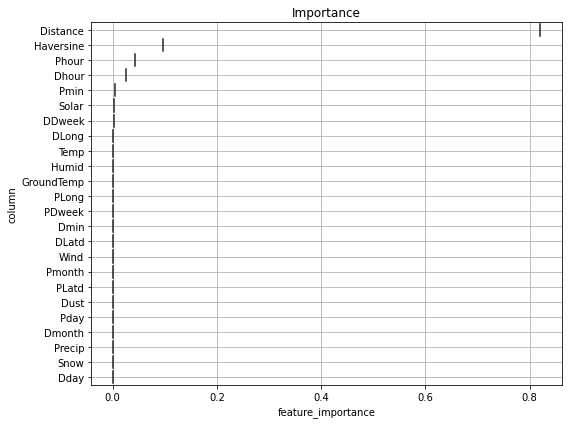

In [ ]:
%%time

# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
gbr = GradientBoostingRegressor()

# Fit the model to the data
gbr.fit(X_train, y_train)

# print score of the model
print_score(gbr)
            
# visualizing the inportance of features.
visualize_importance(gbr.feature_importances_, X_train)

## Decision Tree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

RMSE-Train: 0.0
RMSE-Test: 18.791847168386614
Score-Train: 1.0
Score-Test: 0.4330344395060921
MedAE-Train: 0.0
MedAE-Test: 4.0
MeanAE-Train: 0.0
MeanAE-Test: 10.28624
CPU times: user 2.76 s, sys: 24 ms, total: 2.79 s
Wall time: 2.8 s


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9e6052c10>)

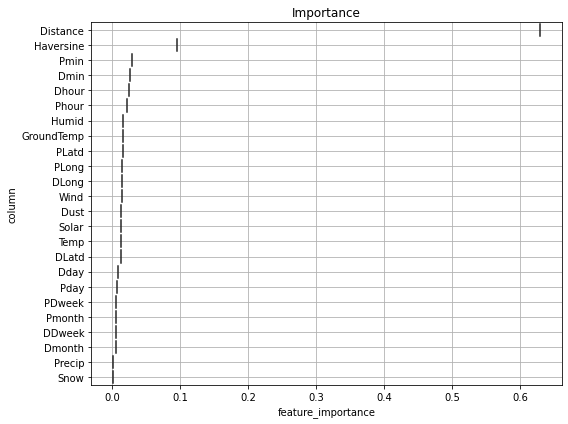

In [ ]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
dtr = DecisionTreeRegressor()

# Fit the model to the data
dtr.fit(X_train, y_train)

# print score of the model
print_score(dtr)

# visualizing the inportance of features.
visualize_importance(dtr.feature_importances_, X_train)

## AdaBoostRegressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction.

RMSE-Train: 17.662994269759878
RMSE-Test: 17.635123361490535
Score-Train: 0.5031832696189189
Score-Test: 0.5006848543437437
MedAE-Train: 12.155237767057201
MedAE-Test: 12.401891567869988
MeanAE-Train: 14.550723611794462
MeanAE-Test: 14.57511904120911
CPU times: user 5.08 s, sys: 75.9 ms, total: 5.16 s
Wall time: 5.16 s


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9e5f62190>)

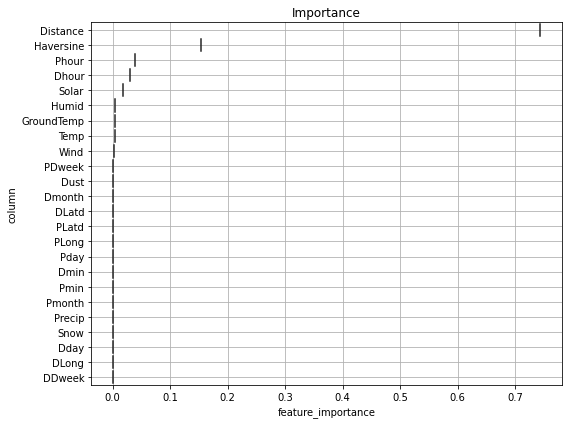

In [ ]:
%%time
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the model
Abr = AdaBoostRegressor()

# Fit the model to the data
Abr.fit(X_train, y_train)

# print score of the model
print_score(Abr)

# visualizing the inportance of features.
visualize_importance(Abr.feature_importances_, X_train)

## XGB Regressor

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

[09:17:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE-Train: 12.579206176966547
RMSE-Test: 12.716171303667121
Score-Train: 0.7480153841534516
Score-Test: 0.7403845852556956
MedAE-Train: 3.785470485687256
MedAE-Test: 3.8519887924194336
MeanAE-Train: 7.3760252154755594
MeanAE-Test: 7.458925295952558
CPU times: user 7.92 s, sys: 95.9 ms, total: 8.02 s
Wall time: 8.19 s


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9e5e62410>)

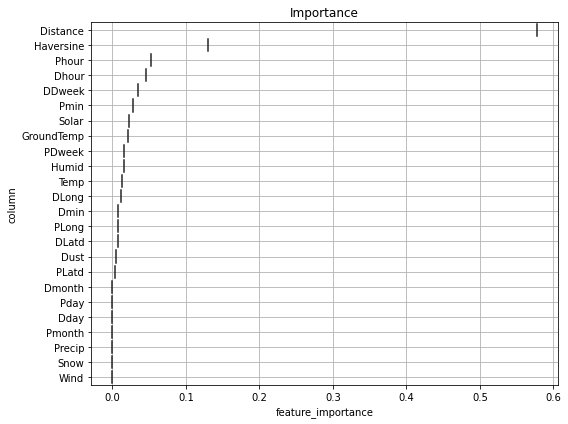

In [ ]:
%%time
# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
Xgb = XGBRegressor()

# Fit the model to the data
Xgb.fit(X_train, y_train)

# print score of the model
print_score(Xgb)

# visualizing the inportance of features.
visualize_importance(Xgb.feature_importances_, X_train)

## Light Gradient Boosted Machine

RMSE-Train: 9.049703585383979
RMSE-Test: 9.545967496389812
Score-Train: 0.8695823815478029
Score-Test: 0.853695515513133
MedAE-Train: 3.0187587697890645
MedAE-Test: 3.119112966436719
MeanAE-Train: 5.462371393637222
MeanAE-Test: 5.717040741489892
CPU times: user 3.91 s, sys: 66.1 ms, total: 3.98 s
Wall time: 4.02 s


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9dcab3cd0>)

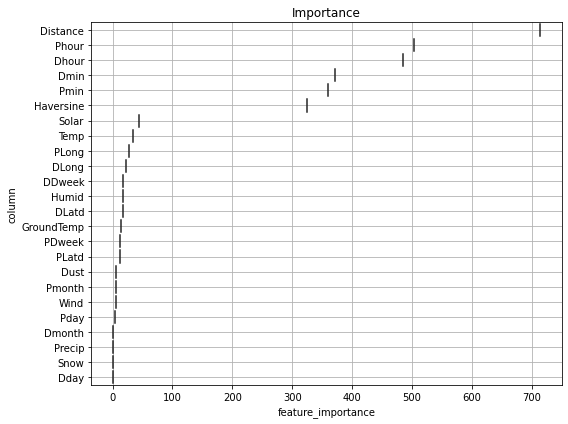

In [ ]:
%%time
# import LGBMregressor
from lightgbm import LGBMRegressor

# Instantiate the model
Lgbm = LGBMRegressor()

# Fit the model to the data
Lgbm.fit(X_train, y_train)

# print score of the model
print_score(Lgbm)

# visualizing the inportance of features.
visualize_importance(Lgbm.feature_importances_, X_train)

## Comparing all the model based on metric

In [ ]:
# Helper function for comparing models metrics
def compare_models(models,names,X_train,y_train,X_test,y_test):
  # the libraries we need
  import sklearn.metrics as metrics
  from sklearn.model_selection import train_test_split


  # now, create a list with the objects 
  data = {'Metric':['rmse','MedAE','MAE','R-squared']}
  df_train = pd.DataFrame(data)
  df_test = pd.DataFrame(data)

  def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())


  for (model,name) in zip(models,names):
    y_pred= model.predict(X_test) # then predict on the test set
    res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
              metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
              metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
              metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
    # get metrics of each model, and add to dataframe 
  df_train[name] = [res[0], res[2], res[4], res[6]]
  df_test[name] = [res[1], res[3], res[5], res[7]]
  return df_train,df_test   

In [ ]:
# list of models object
models = [LR, rf, knn, gbr, dtr, Abr, Xgb, Lgbm]

# list of models name
names = ['Linear Regression', 'Random Forest', 'Kneighbors', 'Gradient Boosting', 'Decision Tree','AdaBoost','XGBoost','LGBM']

# use function for comparing models by passing list of models object, names, train and test data
comp_model_train, comp_model_test = compare_models(models, names, X_train, y_train, X_test, y_test)

### RMSE of all models on train and test data

In [ ]:
# printing rmse comparision of model on train and test
print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])

  Metric      LGBM
0   rmse  9.049704


  Metric      LGBM
0   rmse  9.545967


### All metrics on train and test data

In [ ]:
# printing comparision of model on train and test
print("Results on Train data")
comp_model_train

Results on Train data


,Metric,LGBM
0,rmse,9.049704
1,MedAE,3.018759
2,MAE,5.462371
3,R-squared,0.833732


In [ ]:
print("Results on Test data")
comp_model_test

Results on Test data


,Metric,LGBM
0,rmse,9.545967
1,MedAE,3.119113
2,MAE,5.717041
3,R-squared,0.811954


## Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

## RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

1. The first step is to write the parameters that we want to consider
2. From these parameters select the best ones.(which are printed in output)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X[:5000],y[:5000],test_size=0.25,random_state=123)

In [ ]:
X_train.shape, X_test.shape

((3750, 24), (1250, 24))

In [ ]:
# Use the random grid to search for best hyperparameters
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
  random.fit(X_train, Y_train)
  print("\n Best parameters: ",random.best_params_)

In [ ]:
%%time
# create parameters dict in list for tunning
rf_para_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=400, num=3)],
    'max_features': ['auto','sqrt'],
    'max_depth' : [int(x) for x in np.linspace(10,110, num=3)],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2],
    'bootstrap': [True, False]
    
  
}
# passing data for hyper parameter tunning with RandomSearchCV
random_Search(RandomForestRegressor(), X_train, Y_train, param_grid=rf_para_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: ignored

In [ ]:
%%time
# create parameters dict in list for tunning
knn_para_grid = {
    'leaf_size': list(range(1,20)),
    'n_neighbors': list(range(1,30)),
    'p':[1,2]
}
# passing data for hyper parameter tunning with RandomSearchCV
random_Search(KNeighborsRegressor(), X_train, Y_train, param_grid=knn_para_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits

 Best parameters:  {'p': 1, 'n_neighbors': 29, 'leaf_size': 19}
CPU times: user 2.44 s, sys: 338 ms, total: 2.78 s
Wall time: 35.9 s


In [ ]:
%%time
# create parameters dict in list for tunning
Ada_para_grid = {
    'n_estimators':[10,50,100],
    'learning_rate':[0.0001,0.001,0.01]
}
# passing data for hyper parameter tunning with RandomSearchCV
random_Search(AdaBoostRegressor(), X_train, Y_train, param_grid = Ada_para_grid)

Fitting 3 folds for each of 9 candidates, totalling 27 fits

 Best parameters:  {'n_estimators': 50, 'learning_rate': 0.001}
CPU times: user 1.12 s, sys: 26.5 ms, total: 1.15 s
Wall time: 13.9 s


In [ ]:
%%time
# create parameters dict in list for tunning
XGB_para_grid = {
    'learning_rate': [0.05,0.10,0.15],
    'max_depth' : [3,4,5],
    'min_child_weight':[1,3],
    'gamma' : [0.0, 0.1],
    'colsample_bytree': [0.3,0.4]
}
# passing data for hyper parameter tunning with RandomSearchCV
random_Search(XGBRegressor(), X_train, Y_train, param_grid=XGB_para_grid)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[10:07:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Best parameters:  {'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.4}
CPU times: user 2.37 s, sys: 164 ms, total: 2.54 s
Wall time: 43.5 s


In [ ]:
# create parameters dict in list for tunning
GBR_para_grid = {
    'n_estimators': [10,50,100],
    'min_samples_split':[x for x in range(2,6)],
    'max_depth':[x for x in range(5,8)],
    'learning_rate':[0.1,0.2]
}
# passing data for hyper parameter tunning with RandomSearchCV
random_Search(GradientBoostingRegressor(), X_train, Y_train, param_grid=GBR_para_grid)

Fitting 3 folds for each of 72 candidates, totalling 216 fits

 Best parameters:  {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 5, 'learning_rate': 0.2}


## Using best hyperparameters

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=123)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((75000, 24), (25000, 24), (75000,), (25000,))

## RandomForest Model

RMSE-Train: 5.7914324861422095
RMSE-Test: 12.940040443741617
Score-Train: 0.9465879124656035
Score-Test: 0.7311630230971997
MedAE-Train: 1.4977397706460298
MedAE-Test: 3.6071391143578664
MeanAE-Train: 3.188125695463757
MeanAE-Test: 7.453978913014926
CPU times: user 11min 24s, sys: 2.05 s, total: 11min 26s
Wall time: 12min 18s


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9da09f2d0>)

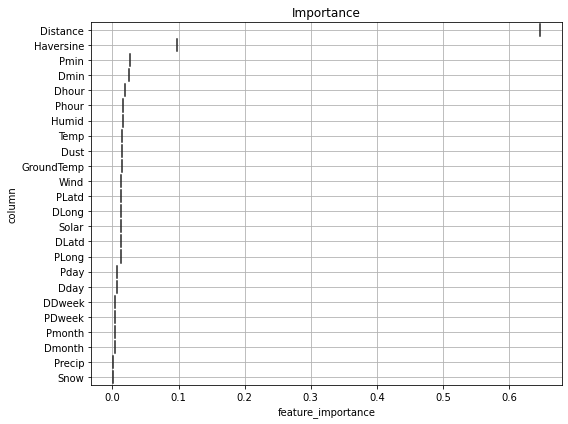

In [ ]:
%%time

# Instantiate the model with best parameters
rf = RandomForestRegressor(**{'n_estimators':400, 'min_samples_split':5, 'max_features':'auto', 'max_depth':60,'bootstrap':True})

# Fit the model to the data
rf.fit(X_train, Y_train)

# print score of the model
print_score(rf)

# visualizing the importance of features.
visualize_importance(rf.feature_importances_, X_train)

## KNN Regressor

In [ ]:
%%time

# Instantiate the model with best parameters
knn = KNeighborsRegressor(**{'p': 1, 'n_neighbors': 29, 'leaf_size': 19})

# Fit the model to the data
knn.fit(X_train, Y_train)

# print score of the model
print_score(knn)

RMSE-Train: 14.741590479901767
RMSE-Test: 15.241102737387648
Score-Train: 0.6539361452545966
Score-Test: 0.6270500812870244
MedAE-Train: 4.413793103448276
MedAE-Test: 4.586206896551722
MeanAE-Train: 8.386442758620689
MeanAE-Test: 8.71414344827586
CPU times: user 23min 33s, sys: 7.1 s, total: 23min 41s
Wall time: 24min 10s


## Adaboost Regressor

RMSE-Train: 15.327485571282214
RMSE-Test: 15.330639423490556
Score-Train: 0.625881324436143
Score-Test: 0.6226552830645371
MedAE-Train: 5.511103725916332
MedAE-Test: 5.4908791208791214
MeanAE-Train: 9.493264066906818
MeanAE-Test: 9.542189086465509
CPU times: user 20.5 s, sys: 269 ms, total: 20.8 s
Wall time: 20.7 s


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9d97b96d0>)

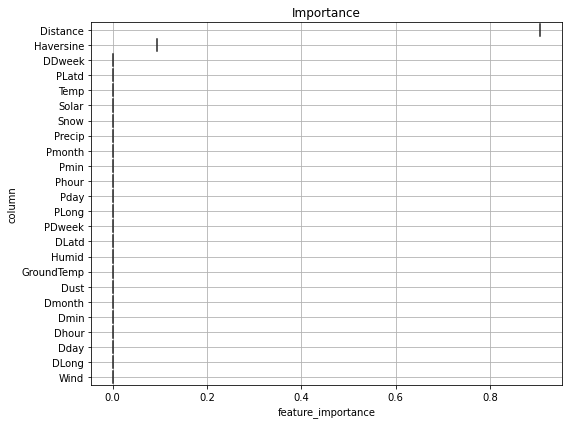

In [ ]:
%%time

# Instantiate the model with best parameters
Abr = AdaBoostRegressor(**{'n_estimators': 50, 'learning_rate': 0.001})

# Fit the model to the data
Abr.fit(X_train, Y_train)

# print score of the model
print_score(Abr)

# visualizing the inportance of features.
visualize_importance(Abr.feature_importances_, X_train)

## XGBoost Regressor

[11:01:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE-Train: 10.97223066603429
RMSE-Test: 11.495572162162327
Score-Train: 0.8082844170704608
Score-Test: 0.787832470377803
MedAE-Train: 3.497882843017578
MedAE-Test: 3.6479666233062744
MeanAE-Train: 6.439180413986842
MeanAE-Test: 6.750820257514715
CPU times: user 8.93 s, sys: 28.8 ms, total: 8.96 s
Wall time: 8.95 s


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9d9672d90>)

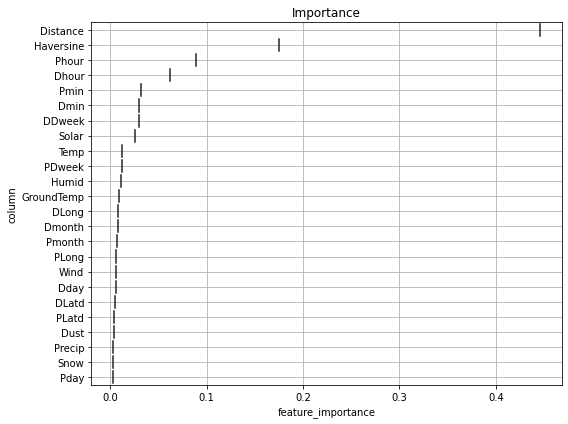

In [ ]:
%%time
# Instantiate the model with best parameters
Xgb = XGBRegressor(** {'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.4})

# Fit the model to the data
Xgb.fit(X_train, Y_train)

# print score of the model
print_score(Xgb)

# visualizing the inportance of features.
visualize_importance(Xgb.feature_importances_, X_train)

RMSE-Train: 7.731249820964079
RMSE-Test: 8.589369334181356
Score-Train: 0.9048153384313847
Score-Test: 0.8815485748298485
MedAE-Train: 2.5343059897129123
MedAE-Test: 2.6659422885001884
MeanAE-Train: 4.517221059594414
MeanAE-Test: 4.902353623561557
CPU times: user 49.6 s, sys: 86.9 ms, total: 49.6 s
Wall time: 49.5 s


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9d95727d0>)

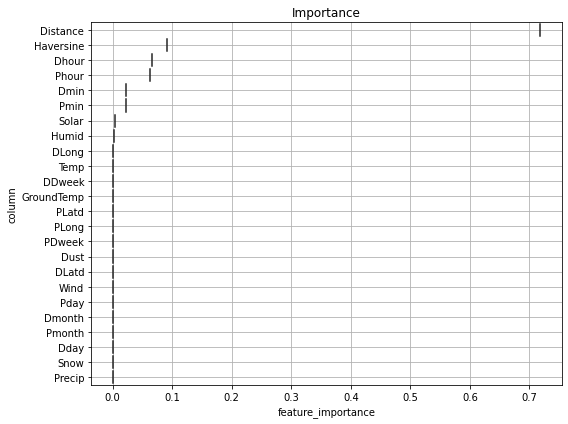

In [ ]:
%%time

# Initialize the models with best parameters
GBR = GradientBoostingRegressor(**{'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 5, 'learning_rate': 0.2})

# Fit the model to the data
GBR.fit(X_train, Y_train)

# print score of the model
print_score(GBR)

# visualizing the inportance of features.
visualize_importance(GBR.feature_importances_, X_train)

In [ ]:
# list of models object
models = [rf, knn, Abr, Xgb, GBR]
# list of models name
names = ['Random Forest', 'KNN', 'AdaBoost', 'XGBoost', 'GBR']
# use function for comparing models by passing list of models object, names, train and test data
comp_model_train, comp_model_test = compare_models(models, names, X_train, Y_train, X_test, Y_test)

In [ ]:
# printing comparision of model on train and test
print("Results on Train data")
comp_model_train

Results on Train data


,Metric,GBR
0,rmse,7.731250
1,MedAE,2.534306
2,MAE,4.517221
3,R-squared,0.885708


In [ ]:
print("Results on Test data")
comp_model_test

Results on Test data


,Metric,GBR
0,rmse,8.589369
1,MedAE,2.665942
2,MAE,4.902354
3,R-squared,0.856269


## CONCLUSION

In this project we have done an extensive Exploratory Data Analysis, visualized the data with amazing plots, build different models, visualized feature importance, did hyper parameter tunning of each model. Finally we found out that, from all the columns in the data Distance is the most important feature of them all and after Hyperparameter Tuning Adaboost Regressor performed much better when compared to remaining models.
